In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import mat73
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_rel
from itertools import chain
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%load_ext autoreload
%autoreload 2

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)
from GLM_regression import *
plt.rcParams.update({'font.size': 12,
                     'axes.spines.right': False,
                     'axes.spines.top':   False,
                     'legend.frameon':    False,})

In [2]:
datasets_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, "datasets"))
filename_SST = "SSTindivsomata_GLM"
filepath_SST = os.path.join(datasets_dir, filename_SST+".mat")


datasets_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, "datasets"))
filename_NDNF = "NDNFindivsomata_GLM"
filepath_NDNF = os.path.join(datasets_dir, filename_NDNF+".mat")


datasets_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, "datasets"))
filename_EC = "EC_GLM"
filepath_EC = os.path.join(datasets_dir, filename_EC+".mat")

In [3]:
activity_dict_SST, factors_dict_SST = preprocess_data(filepath_SST, normalize=True)
activity_dict_NDNF, factors_dict_NDNF = preprocess_data(filepath_NDNF, normalize=True)
activity_dict_EC, factors_dict_EC = preprocess_data(filepath_EC, normalize=True)

In [4]:
#DO NOT RUN THIS CELL IF YOU WANT TO INCLUDE ALL VARIABLES IN THE GLM 

#options: "Velocity", "Licks", "Reward_loc", Position_bin_1 ... Position_bin_10

filtered_factors_dict_SST = subset_variables_from_data(factors_dict_SST, variables_to_keep=["Velocity"])
filtered_factors_dict_NDNF = subset_variables_from_data(factors_dict_NDNF, variables_to_keep=["Velocity"])
filtered_factors_dict_EC = subset_variables_from_data(factors_dict_EC, variables_to_keep=["Velocity"])


In [5]:


GLM_params_SST, predicted_activity_dict_SST = fit_GLM_population(filtered_factors_dict_SST, activity_dict_SST, quintile=None, regression='ridge', renormalize=True, alphas=None)

GLM_params_NDNF, predicted_activity_dict_NDNF = fit_GLM_population(filtered_factors_dict_NDNF, activity_dict_NDNF, quintile=None, regression='ridge', renormalize=True, alphas=None)
    
GLM_params_EC, predicted_activity_dict_EC = fit_GLM_population(filtered_factors_dict_EC, activity_dict_EC, quintile=None, regression='ridge', renormalize=True, alphas=None)
  

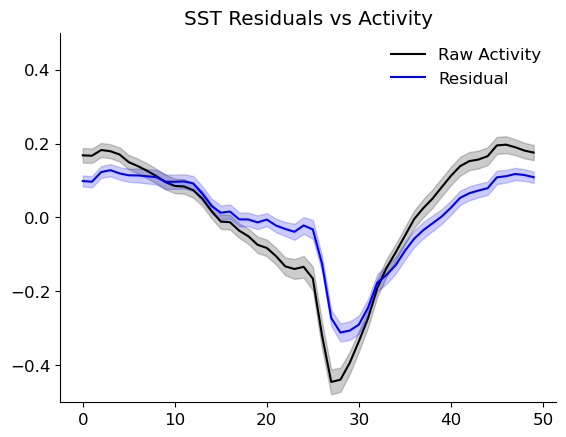

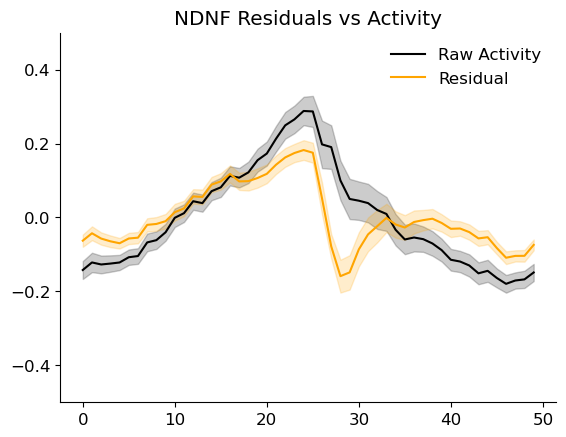

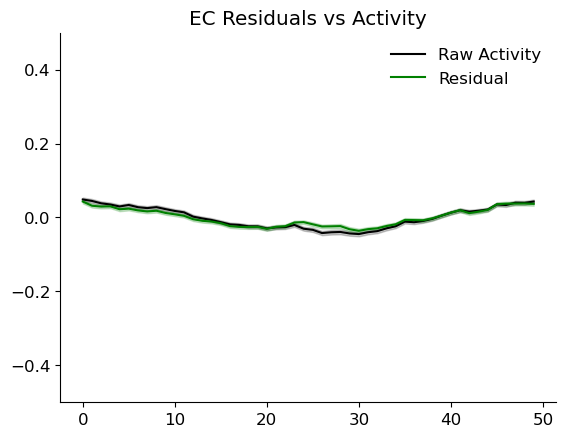

In [6]:
#### Cell and Trial Averaged Velocity-Subtracted Residual vs Raw Data 

plot_cell_trial_average_variable_subtraction(activity_dict_SST, activity_dict_NDNF, activity_dict_EC, predicted_activity_dict_SST, predicted_activity_dict_NDNF, predicted_activity_dict_EC)

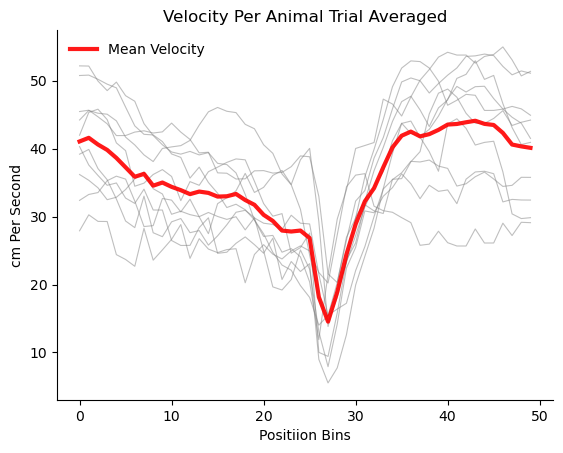

In [74]:
trial_av_aminal_list = []
for animal in filtered_factors_dict_SST:
    value = filtered_factors_dict_SST[animal]["Velocity"]
    trial_av_aminal_list.append(np.mean(value, axis=1))

velocity_array = np.stack(trial_av_aminal_list) *100
mean_velocity = np.mean(velocity_array, axis=0)
    
plt.figure()
for trial in velocity_array:
    plt.plot(trial, color="gray", alpha=0.5, linewidth=0.8)
plt.plot(mean_velocity, linewidth=3, color="red", alpha=0.9, label="Mean Velocity")
plt.title("Velocity Per Animal Trial Averaged")
plt.xlabel("Positiion Bins")
plt.ylabel("cm Per Second")
plt.legend()
plt.show()


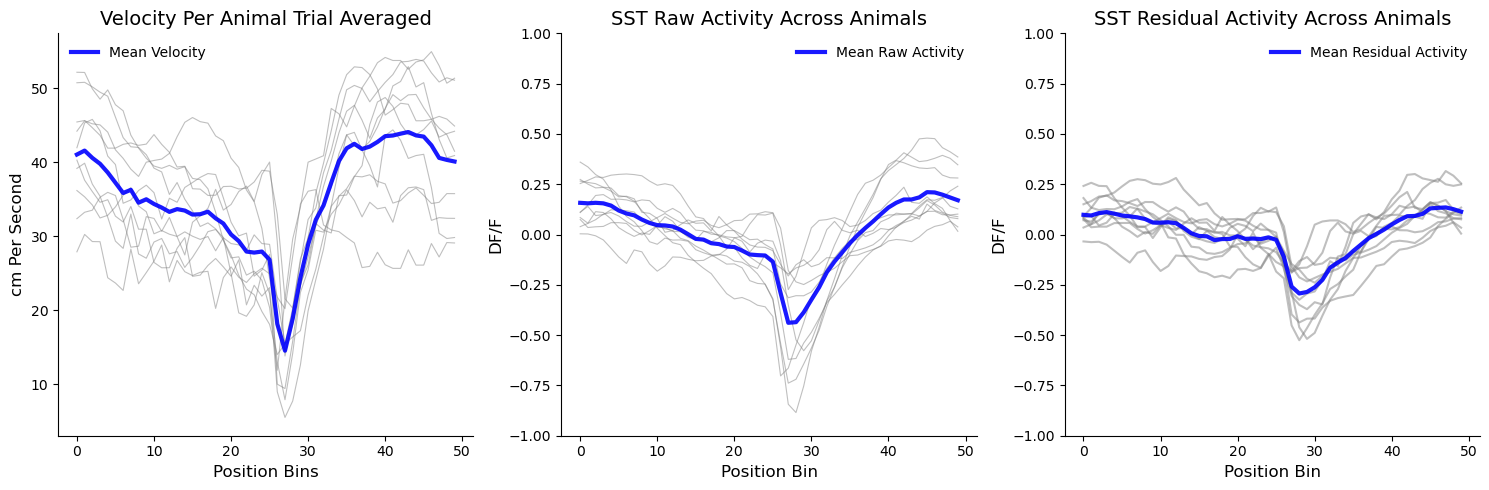

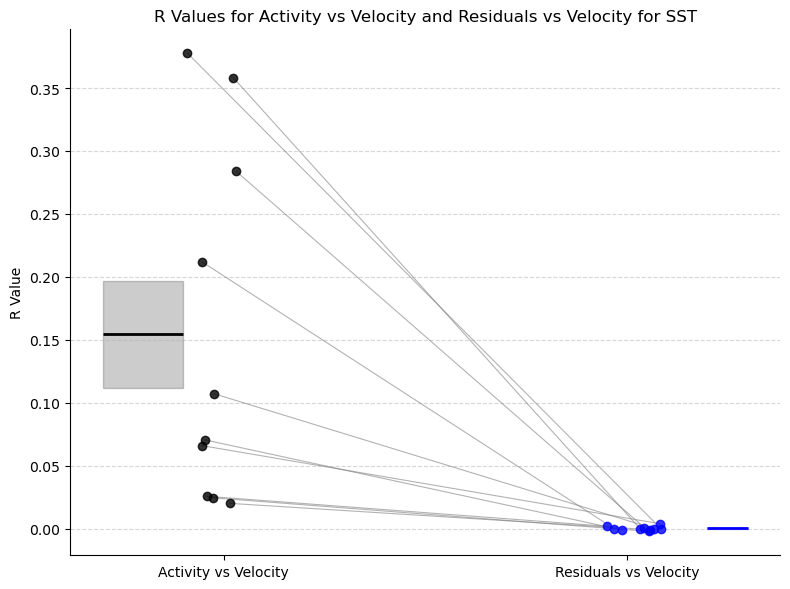

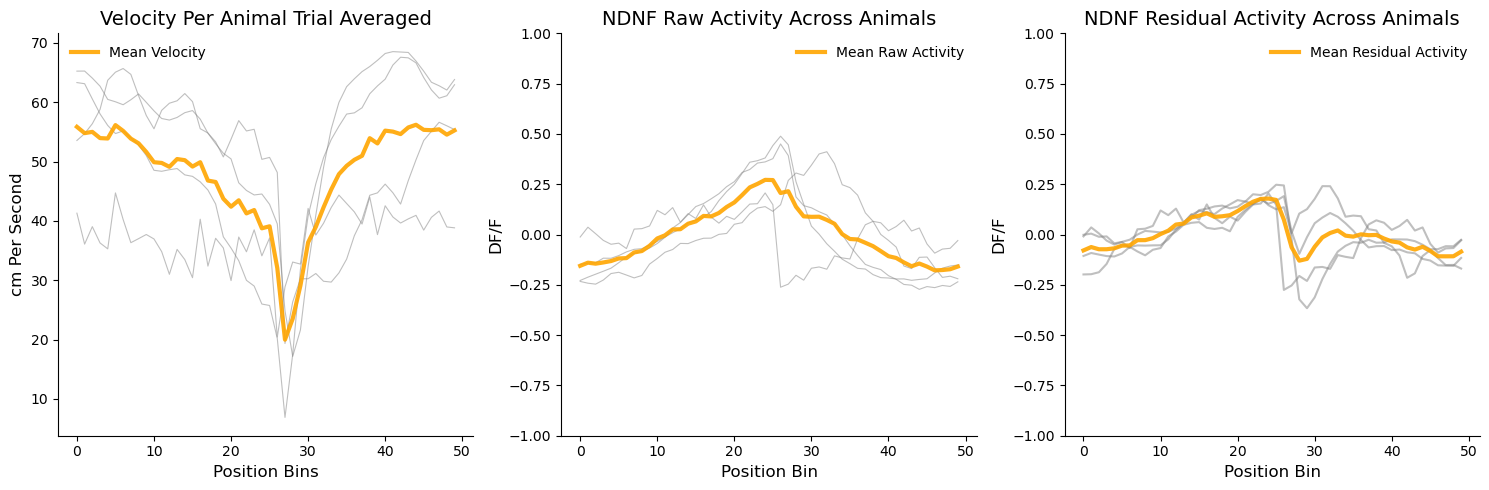

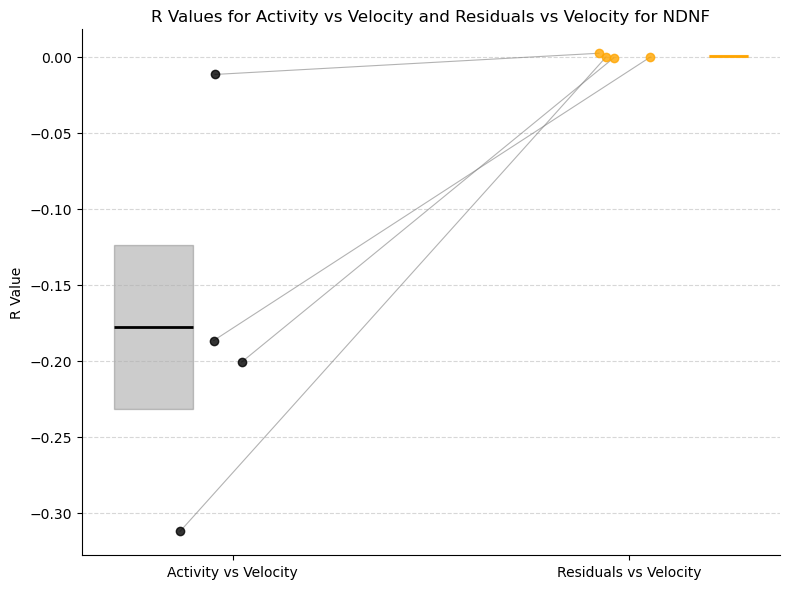

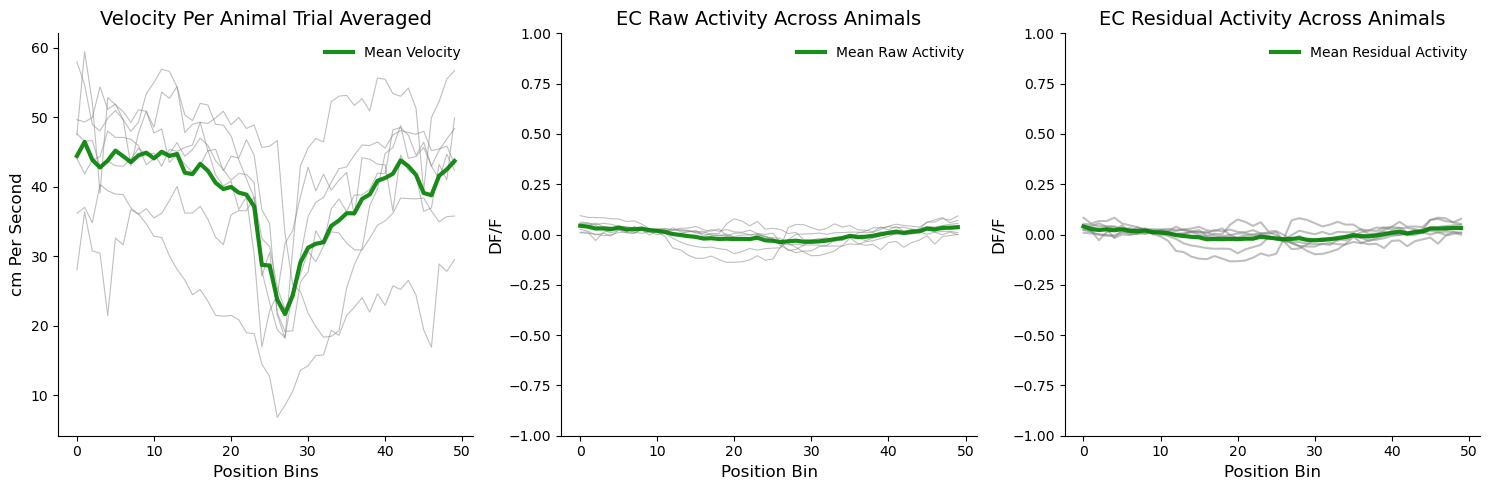

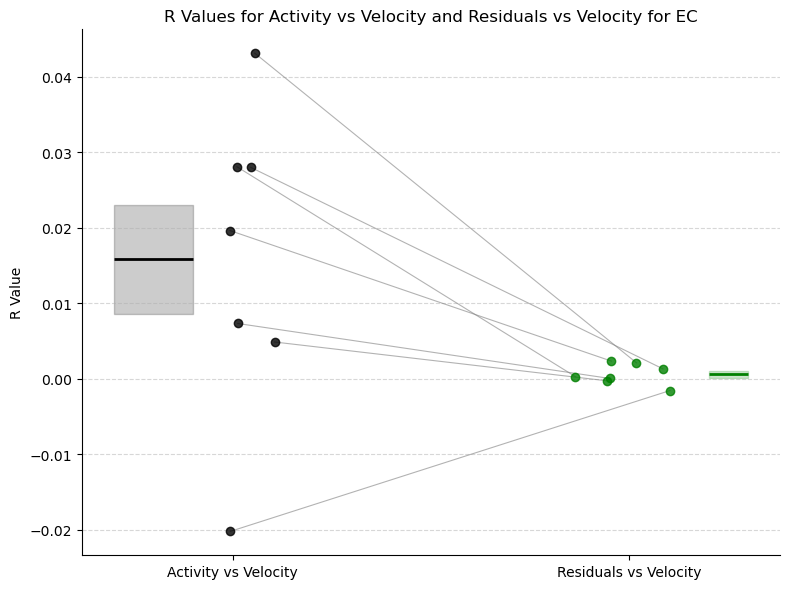

In [88]:
#### Same as Above But For One Cell 

neuron_activity_list_SST, predictions_list_SST, cell_residual_list_SST = get_neuron_activity_prediction_residual(activity_dict_SST, predicted_activity_dict_SST)
animal_mean_list_SST, animal_sem_list_SST, animal_mean_residuals_SST, animal_sem_residuals_SST = get_animal_mean_sem(activity_dict_SST, cell_residual_list_SST) 
plot_single_animal_average_trace(animal_mean_list_SST, animal_mean_residuals_SST, activity_dict_SST, predicted_activity_dict_SST, filtered_factors_dict_SST, cell_type="SST")

neuron_activity_list_NDNF, predictions_list_NDNF, cell_residual_list_NDNF = get_neuron_activity_prediction_residual(activity_dict_NDNF, predicted_activity_dict_NDNF)
animal_mean_list_NDNF, animal_sem_list_NDNF, animal_mean_residuals_NDNF, animal_sem_residuals_NDNF = get_animal_mean_sem(activity_dict_NDNF, cell_residual_list_NDNF) 
plot_single_animal_average_trace(animal_mean_list_NDNF, animal_mean_residuals_NDNF, activity_dict_NDNF, predicted_activity_dict_NDNF, filtered_factors_dict_NDNF, cell_type="NDNF")

neuron_activity_list_EC, predictions_list_EC, cell_residual_list_EC = get_neuron_activity_prediction_residual(activity_dict_EC, predicted_activity_dict_EC)
animal_mean_list_EC, animal_sem_list_EC, animal_mean_residuals_EC, animal_sem_residuals_EC = get_animal_mean_sem(activity_dict_EC, cell_residual_list_EC) 
plot_single_animal_average_trace(animal_mean_list_EC, animal_mean_residuals_EC, activity_dict_EC, predicted_activity_dict_EC, filtered_factors_dict_EC, cell_type="EC")



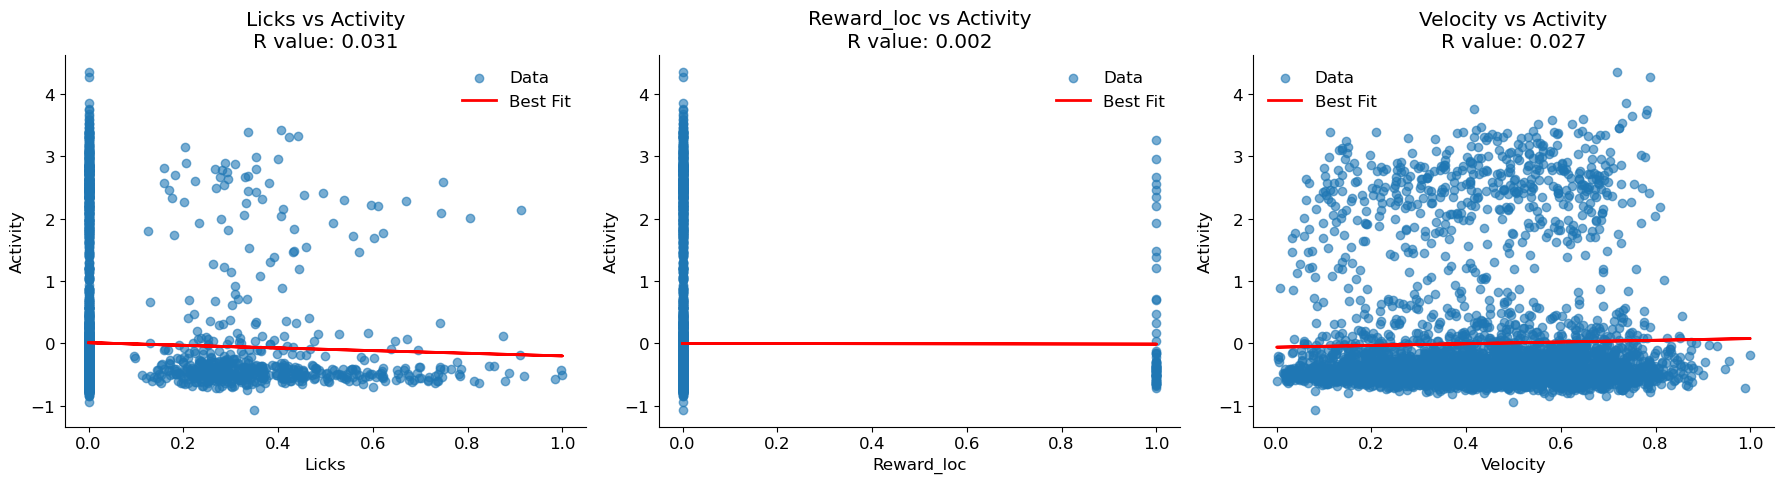

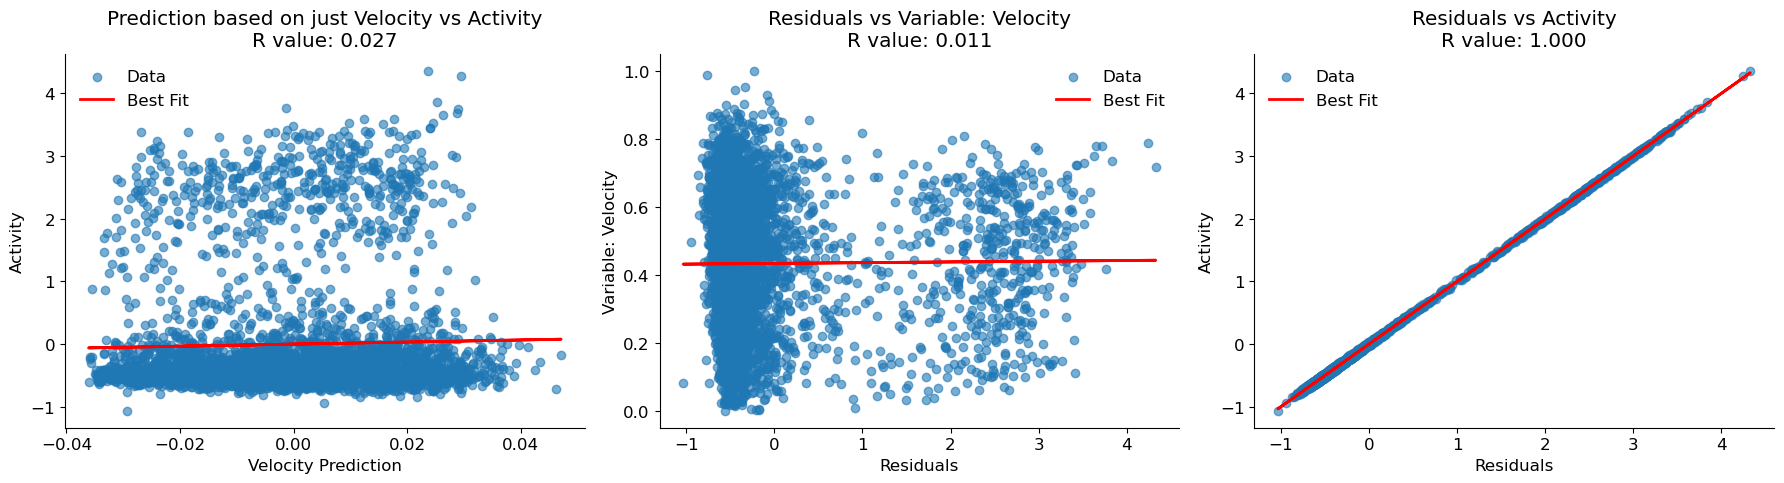

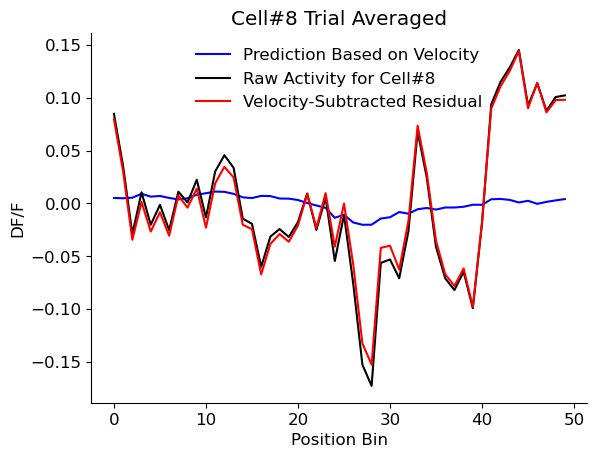

In [8]:
#proof that the velocity-subtracted residuals are less correlated with velocity

cell_number=8

# plot_correlations_single_variable_GLM(GLM_params_SST, factors_dict_SST, filtered_factors_dict_SST, predicted_activity_dict_SST, activity_dict_SST, cell_number, variable_to_correlate_list=["Licks", "Reward_loc", "Velocity"], variable_into_GLM="Velocity")
    

# plot_correlations_single_variable_GLM(GLM_params_NDNF, factors_dict_NDNF, filtered_factors_dict_NDNF, predicted_activity_dict_NDNF, activity_dict_NDNF, cell_number, variable_to_correlate_list=["Licks", "Reward_loc", "Velocity"], variable_into_GLM="Velocity")


plot_correlations_single_variable_GLM(GLM_params_EC, factors_dict_EC, filtered_factors_dict_EC, predicted_activity_dict_EC, activity_dict_EC, cell_number, variable_to_correlate_list=["Licks", "Reward_loc", "Velocity"], variable_into_GLM="Velocity")


{'cell_2': -0.02805203985870934, 'cell_3': 0.058591568235027994, 'cell_4': -0.11944583148966917, 'cell_5': 0.03019990662725703, 'cell_6': 0.1599908935431968}


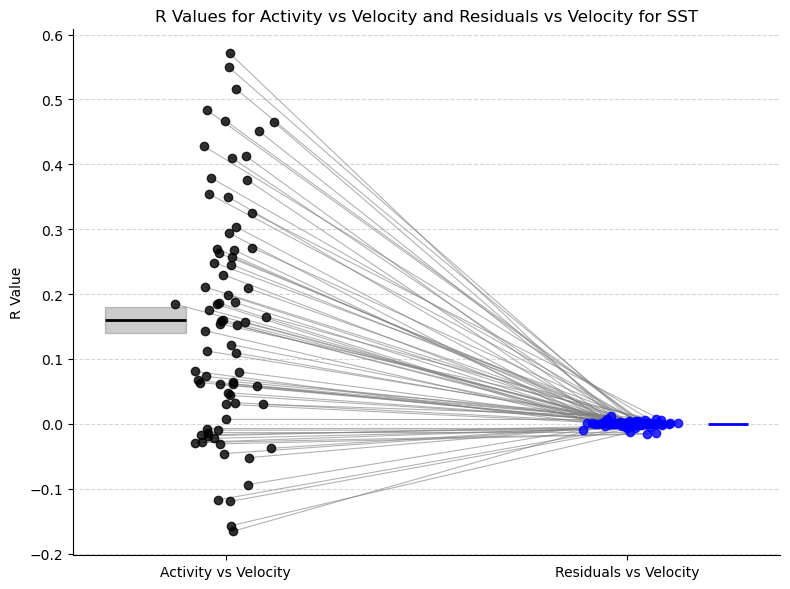

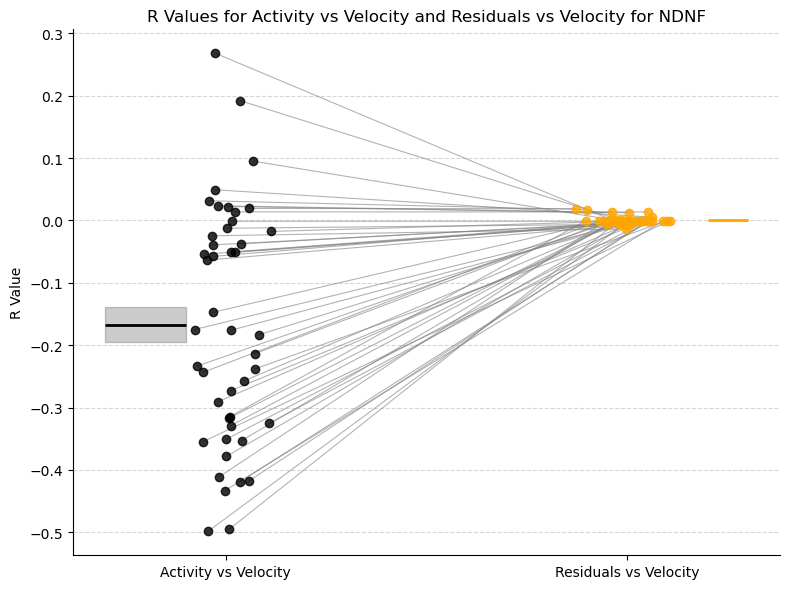

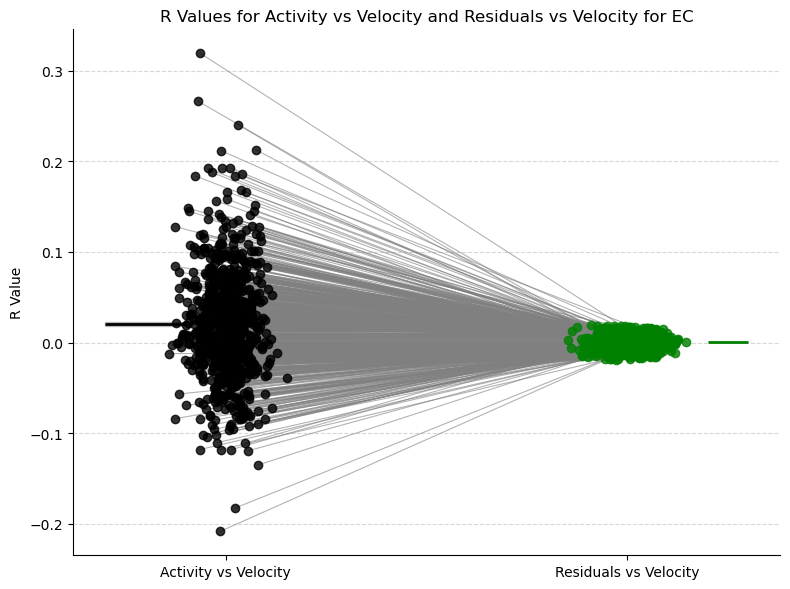

In [41]:
#proof that the velocity-subtracted residuals are less correlated with velocity

r2_variable_activity_dict_SST, r2_variable_residual_dict_SST = get_pop_correlation_to_variable(activity_dict_SST, predicted_activity_dict_SST, filtered_factors_dict_SST, variable_to_correlate="Velocity")


r2_variable_activity_dict_NDNF, r2_variable_residual_dict_NDNF = get_pop_correlation_to_variable(activity_dict_NDNF, predicted_activity_dict_NDNF, filtered_factors_dict_NDNF, variable_to_correlate="Velocity")


r2_variable_activity_dict_EC, r2_variable_residual_dict_EC = get_pop_correlation_to_variable(activity_dict_EC, predicted_activity_dict_EC, filtered_factors_dict_EC, variable_to_correlate="Velocity")


plot_pop_correlation(r2_variable_activity_dict_SST, r2_variable_residual_dict_SST, variable_to_correlate="Velocity", cell_type="SST", color="blue", dictionary=True)


plot_pop_correlation(r2_variable_activity_dict_NDNF, r2_variable_residual_dict_NDNF, variable_to_correlate="Velocity", cell_type="NDNF", color="orange", dictionary=True)


plot_pop_correlation(r2_variable_activity_dict_EC, r2_variable_residual_dict_EC, variable_to_correlate="Velocity", cell_type="EC", color="green", dictionary=True)


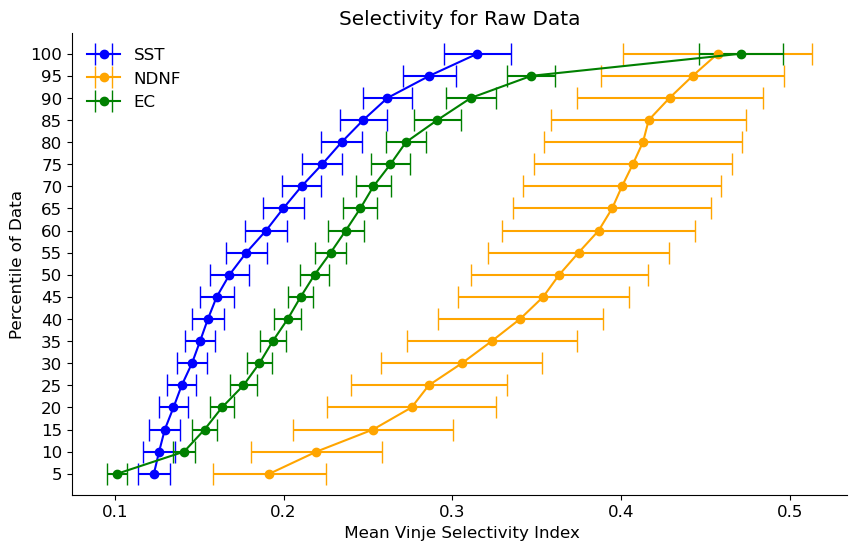

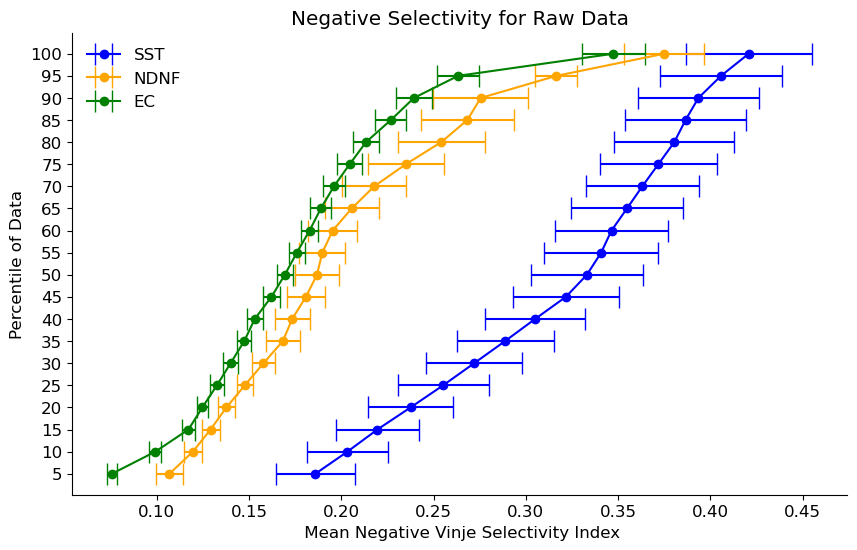

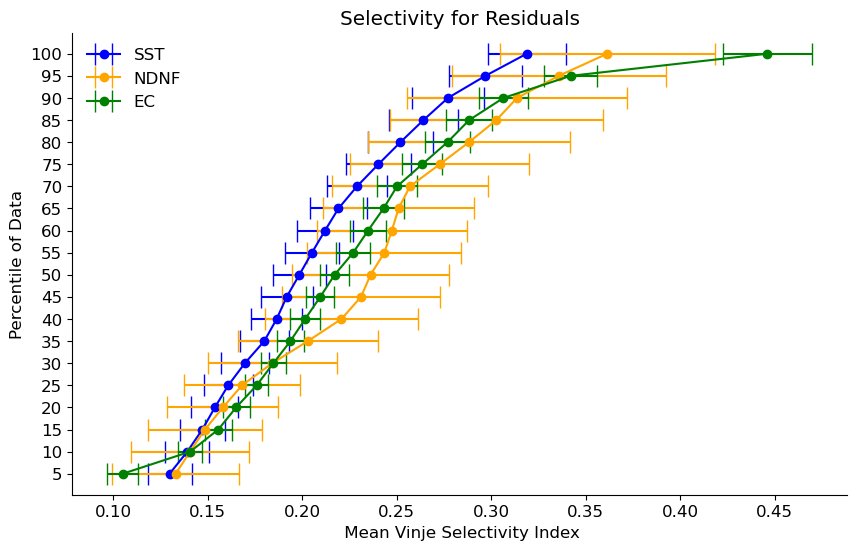

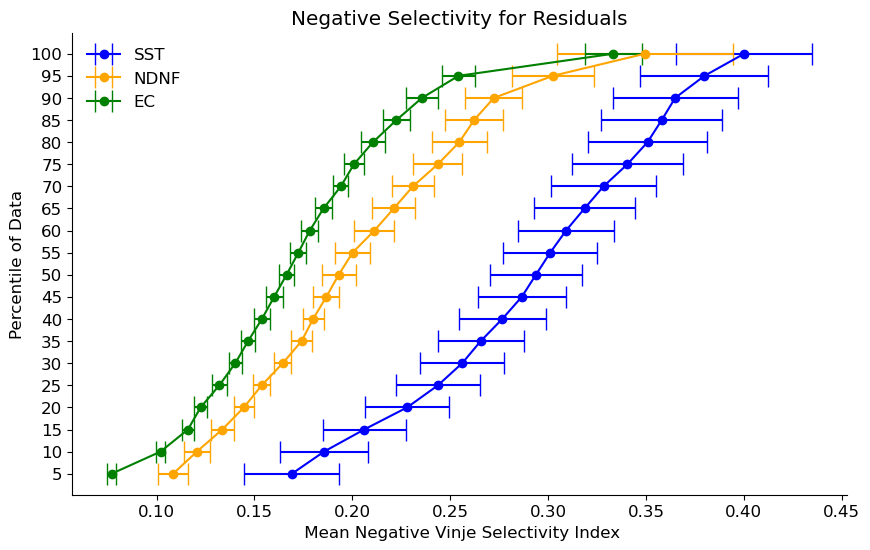

In [10]:
#Selectivity

setup_CDF_plotting_and_plot_selectivity(activity_dict_SST, predicted_activity_dict_SST, activity_dict_NDNF, predicted_activity_dict_NDNF, activity_dict_EC, predicted_activity_dict_EC, residual=False)

setup_CDF_plotting_and_plot_selectivity(activity_dict_SST, predicted_activity_dict_SST, activity_dict_NDNF, predicted_activity_dict_NDNF, activity_dict_EC, predicted_activity_dict_EC, residual=True)



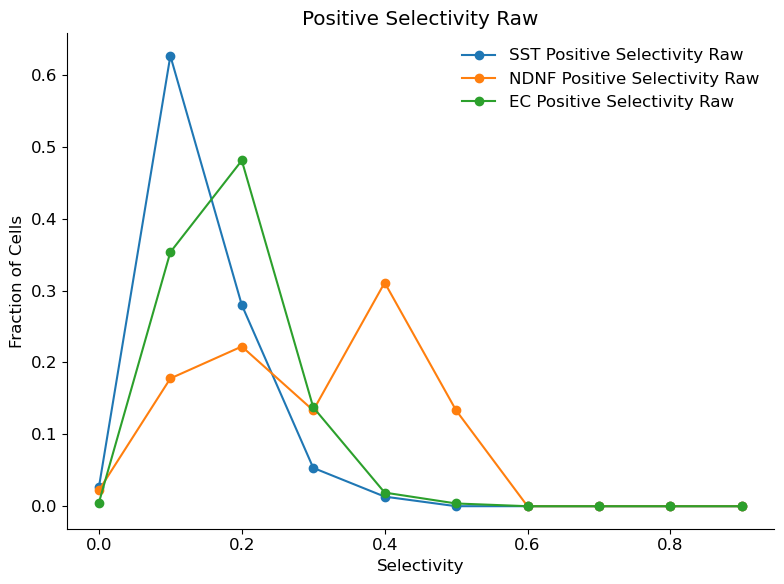

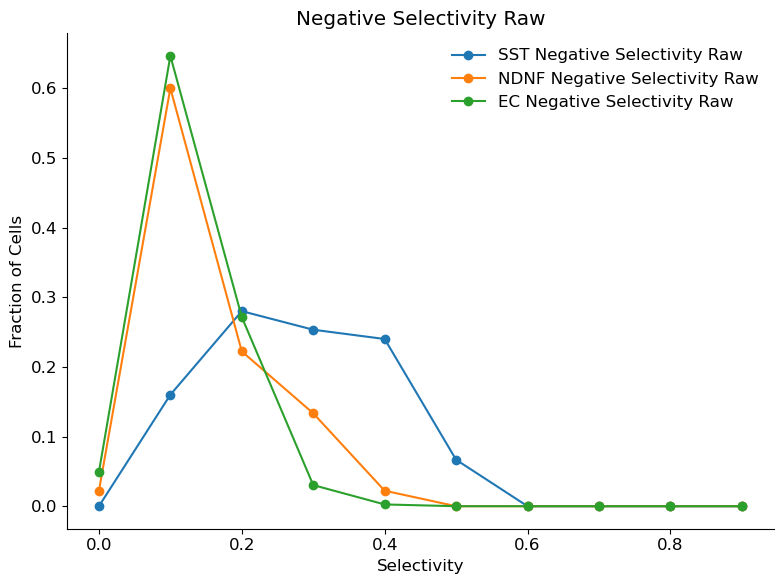

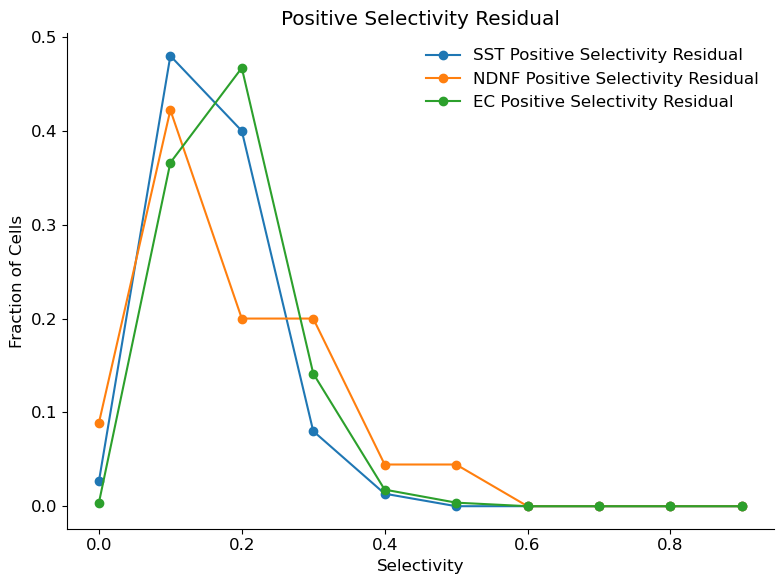

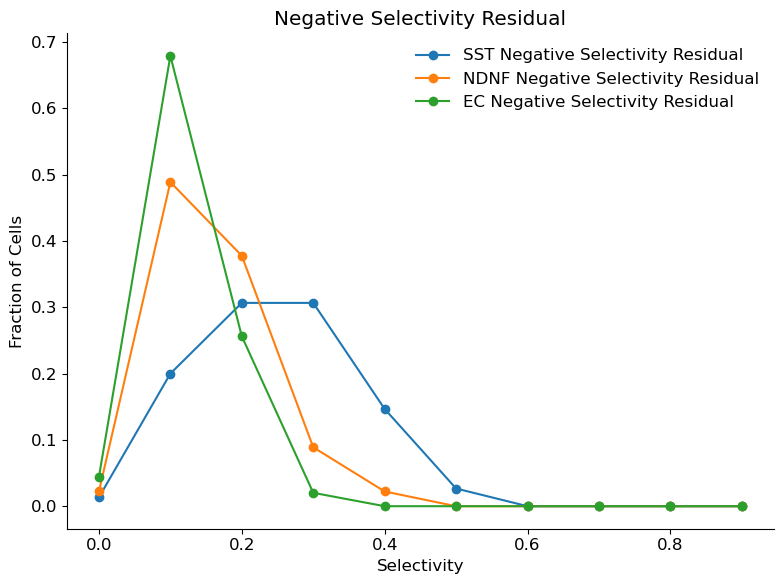

In [11]:


SST_selectivity_raw_list, SST_negative_selectivity_raw, NDNF_selectivity_raw_list, NDNF_negative_selectivity_raw, EC_selectivity_raw_list, EC_negative_selectivity_raw=get_selectivity_for_plotting(activity_dict_SST, predicted_activity_dict_SST, activity_dict_NDNF,
                                 predicted_activity_dict_NDNF, activity_dict_EC, predicted_activity_dict_EC,
                                 residual=False)

    
SST_selectivity_residual_list, SST_negative_selectivity_residual, NDNF_selectivity_residual_list, NDNF_negative_selectivity_residual, EC_selectivity_residual_list, EC_negative_selectivity_residual=get_selectivity_for_plotting(activity_dict_SST, predicted_activity_dict_SST, activity_dict_NDNF,
                                 predicted_activity_dict_NDNF, activity_dict_EC, predicted_activity_dict_EC,
                                 residual=True)
    


plot_selectivity_frequency(SST_selectivity_raw_list, NDNF_selectivity_raw_list, EC_selectivity_raw_list, name="Positive Selectivity Raw")
plot_selectivity_frequency(SST_negative_selectivity_raw, NDNF_negative_selectivity_raw, EC_negative_selectivity_raw, name="Negative Selectivity Raw")
plot_selectivity_frequency(SST_selectivity_residual_list, NDNF_selectivity_residual_list, EC_selectivity_residual_list, name="Positive Selectivity Residual")
plot_selectivity_frequency(SST_negative_selectivity_residual, NDNF_negative_selectivity_residual, EC_negative_selectivity_residual, name="Negative Selectivity Residual")


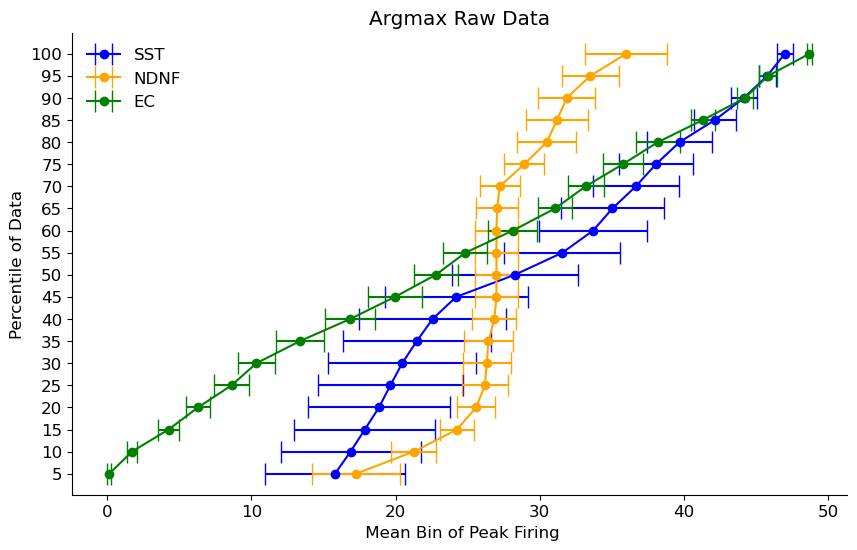

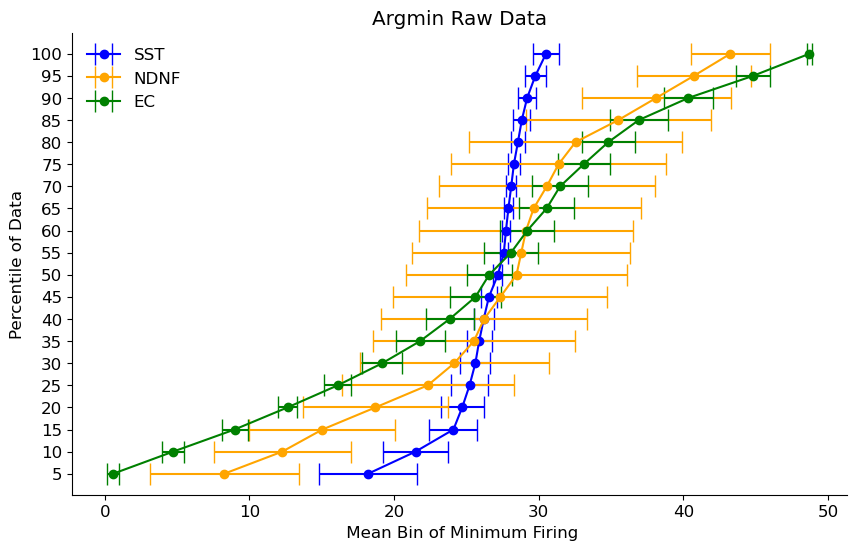

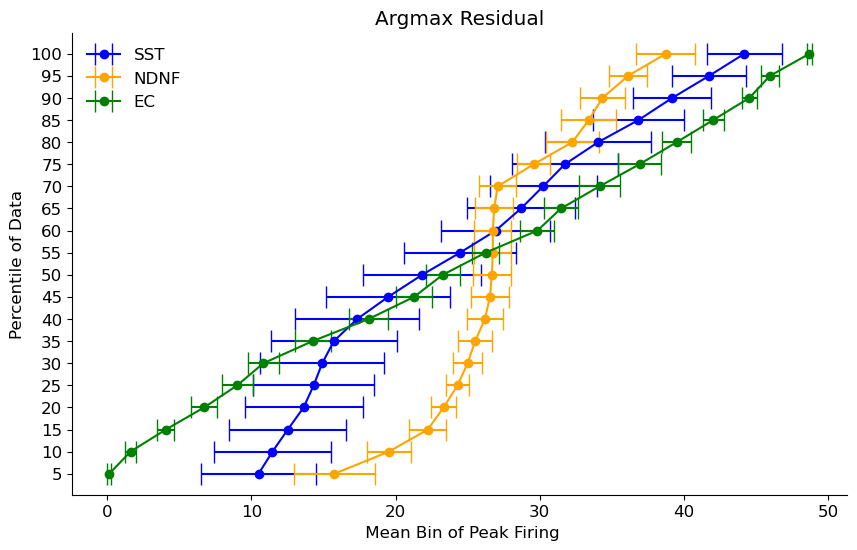

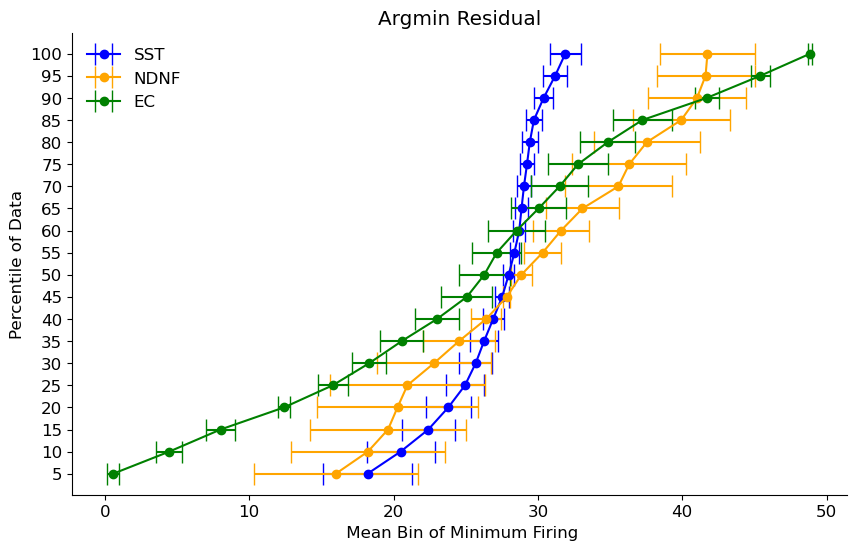

In [12]:

setup_argmin_argmax_cdf_plotting_and_plot(activity_dict_SST, predicted_activity_dict_SST, 
                              activity_dict_NDNF, predicted_activity_dict_NDNF, 
                              activity_dict_EC, predicted_activity_dict_EC, 
                              residual=False)
setup_argmin_argmax_cdf_plotting_and_plot(activity_dict_SST, predicted_activity_dict_SST, 
                              activity_dict_NDNF, predicted_activity_dict_NDNF, 
                              activity_dict_EC, predicted_activity_dict_EC, 
                              residual=True)

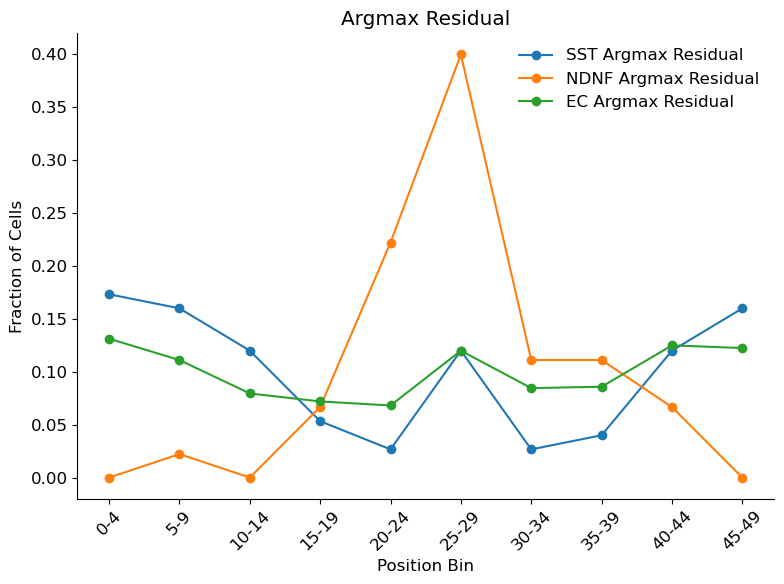

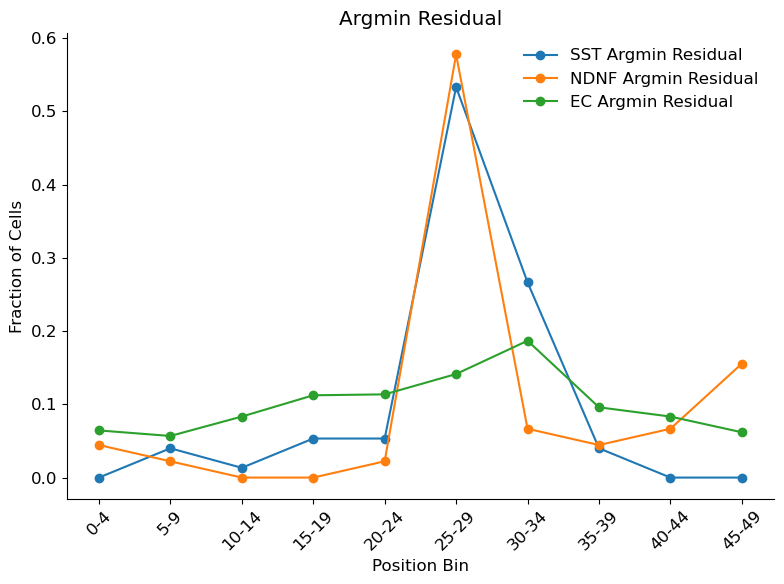

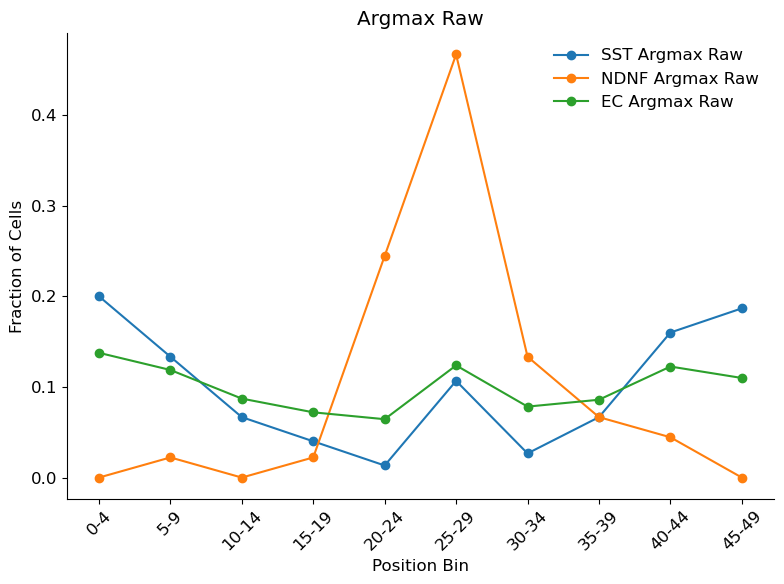

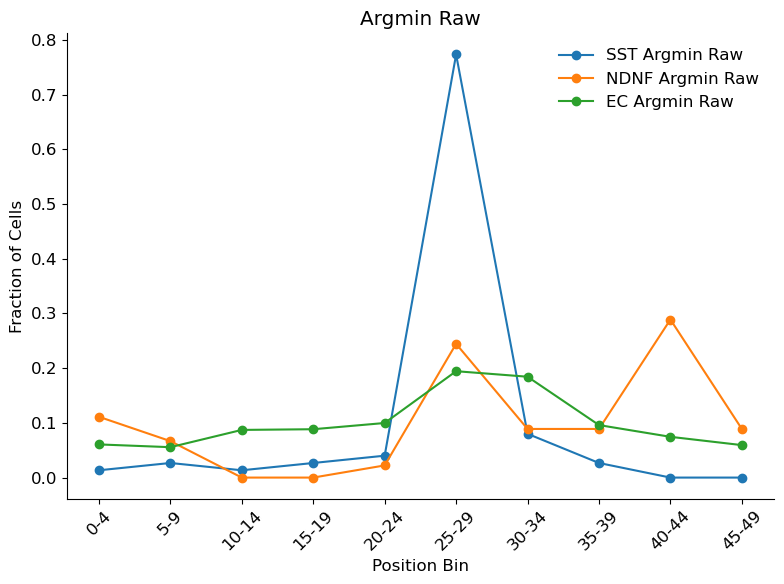

In [13]:
SST_argmax_list, NDNF_argmax_list, EC_argmax_list = split_argmin_argmax(activity_dict_SST, predicted_activity_dict_SST, 
                              activity_dict_NDNF, predicted_activity_dict_NDNF, 
                              activity_dict_EC, predicted_activity_dict_EC, 
                              residual=True, which_to_plot="argmax")
SST_argmin_list, NDNF_argmin_list, EC_argmin_list = split_argmin_argmax(activity_dict_SST, predicted_activity_dict_SST, 
                              activity_dict_NDNF, predicted_activity_dict_NDNF, 
                              activity_dict_EC, predicted_activity_dict_EC, 
                              residual=True, which_to_plot="argmin")

plot_position_frequency(SST_argmax_list, NDNF_argmax_list, EC_argmax_list, selectivity_or_arg="arg", name="Argmax Residual")
plot_position_frequency(SST_argmin_list, NDNF_argmin_list, EC_argmin_list, selectivity_or_arg="arg", name="Argmin Residual")

SST_argmax_list, NDNF_argmax_list, EC_argmax_list = split_argmin_argmax(activity_dict_SST, predicted_activity_dict_SST, 
                              activity_dict_NDNF, predicted_activity_dict_NDNF, 
                              activity_dict_EC, predicted_activity_dict_EC, 
                              residual=False, which_to_plot="argmax")
SST_argmin_list, NDNF_argmin_list, EC_argmin_list = split_argmin_argmax(activity_dict_SST, predicted_activity_dict_SST, 
                              activity_dict_NDNF, predicted_activity_dict_NDNF, 
                              activity_dict_EC, predicted_activity_dict_EC, 
                              residual=False, which_to_plot="argmin")

plot_position_frequency(SST_argmax_list, NDNF_argmax_list, EC_argmax_list, selectivity_or_arg="arg", name="Argmax Raw")
plot_position_frequency(SST_argmin_list, NDNF_argmin_list, EC_argmin_list, selectivity_or_arg="arg", name="Argmin Raw")


trial_av_activity_SST_stack.shape (75, 50)


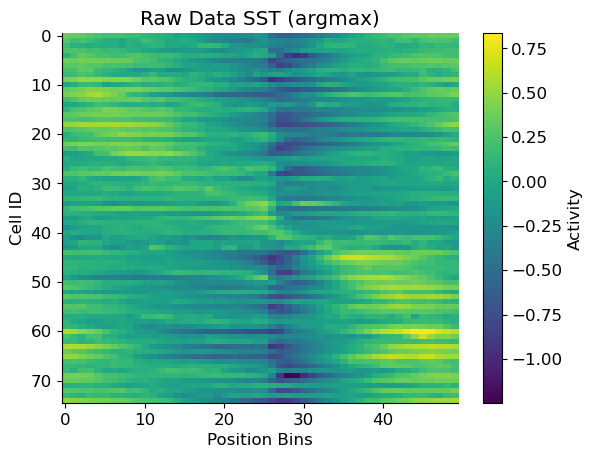

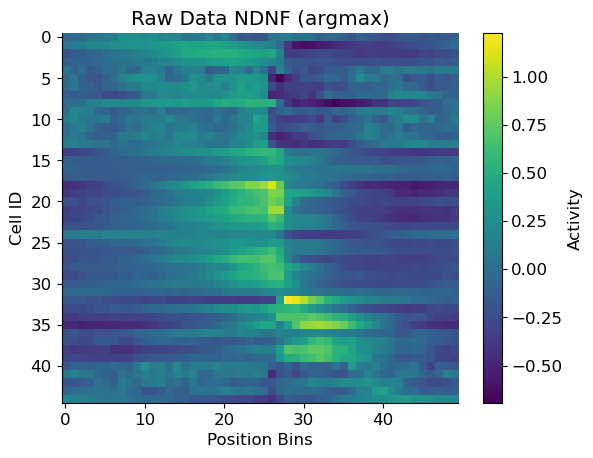

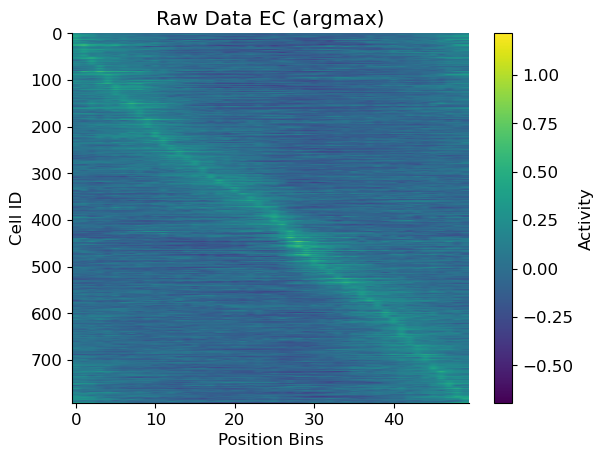

trial_av_activity_SST_stack.shape (75, 50)


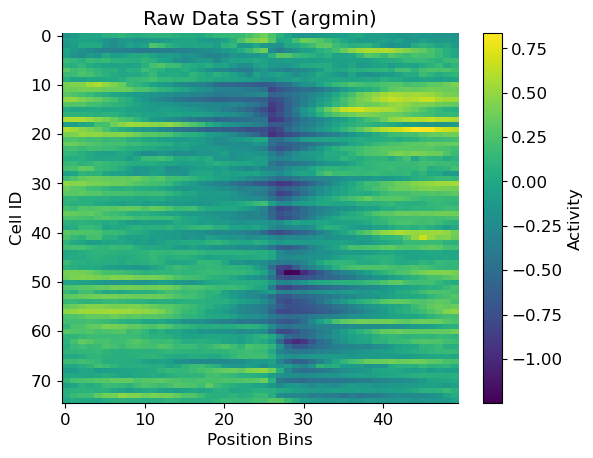

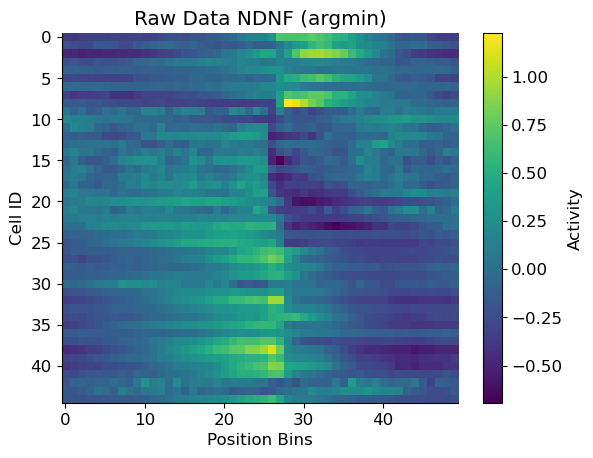

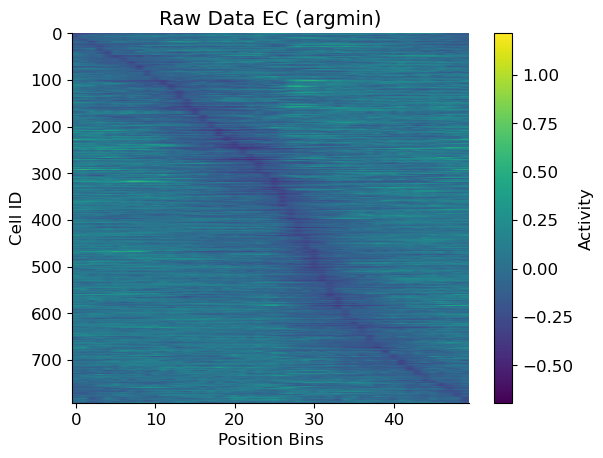

trial_av_activity_SST_stack.shape (75, 50)


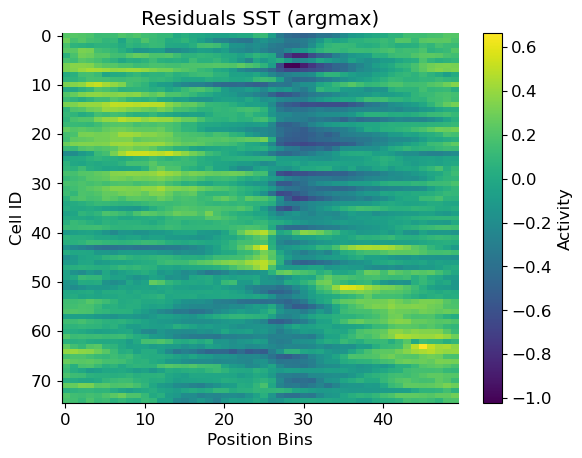

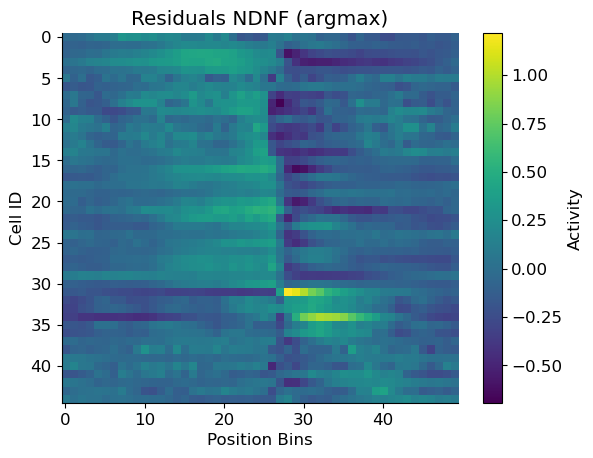

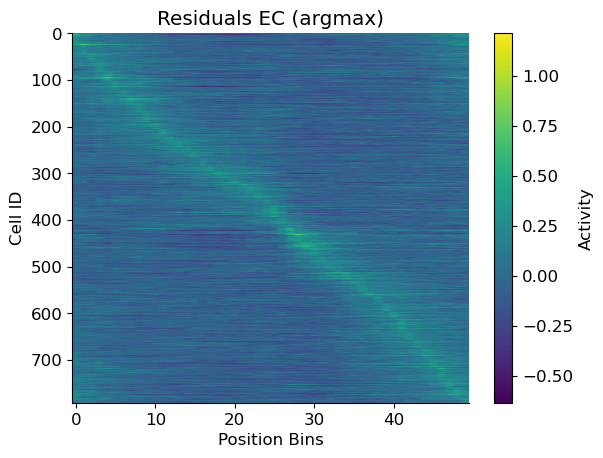

trial_av_activity_SST_stack.shape (75, 50)


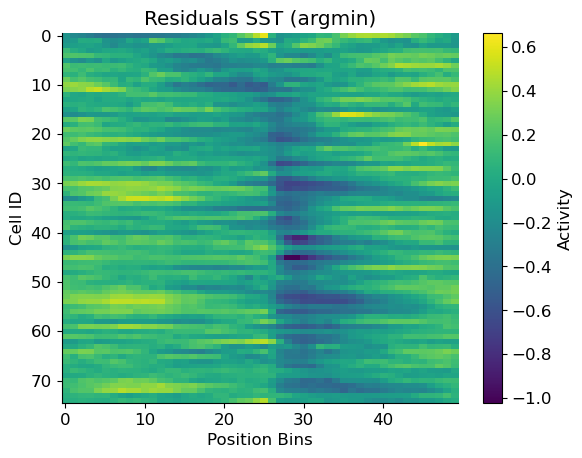

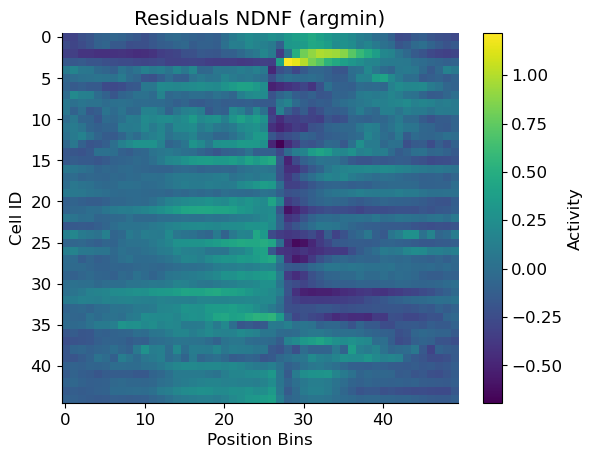

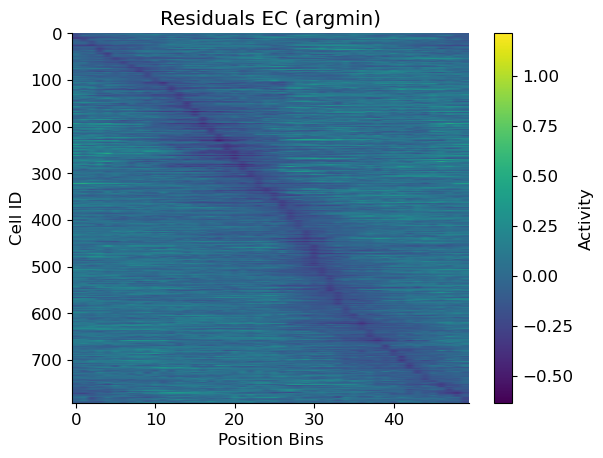

In [14]:



    
plot_trial_averages(activity_dict_SST, predicted_activity_dict_SST, activity_dict_NDNF, predicted_activity_dict_NDNF, activity_dict_EC, predicted_activity_dict_EC, residual=False, which_to_plot="argmax")

plot_trial_averages(activity_dict_SST, predicted_activity_dict_SST, activity_dict_NDNF, predicted_activity_dict_NDNF, activity_dict_EC, predicted_activity_dict_EC, residual=False, which_to_plot="argmin")

plot_trial_averages(activity_dict_SST, predicted_activity_dict_SST, activity_dict_NDNF, predicted_activity_dict_NDNF, activity_dict_EC, predicted_activity_dict_EC, residual=True, which_to_plot="argmax")

plot_trial_averages(activity_dict_SST, predicted_activity_dict_SST, activity_dict_NDNF, predicted_activity_dict_NDNF, activity_dict_EC, predicted_activity_dict_EC, residual=True, which_to_plot="argmin")

    


In [15]:
########## splitting data by velocity correlation: split data into 2 groups - r value vs velocity 
# either above or below zero

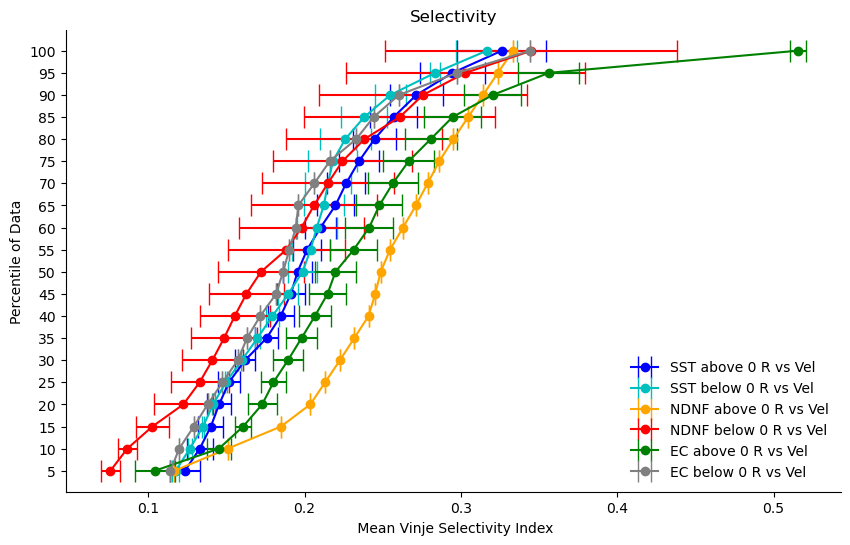

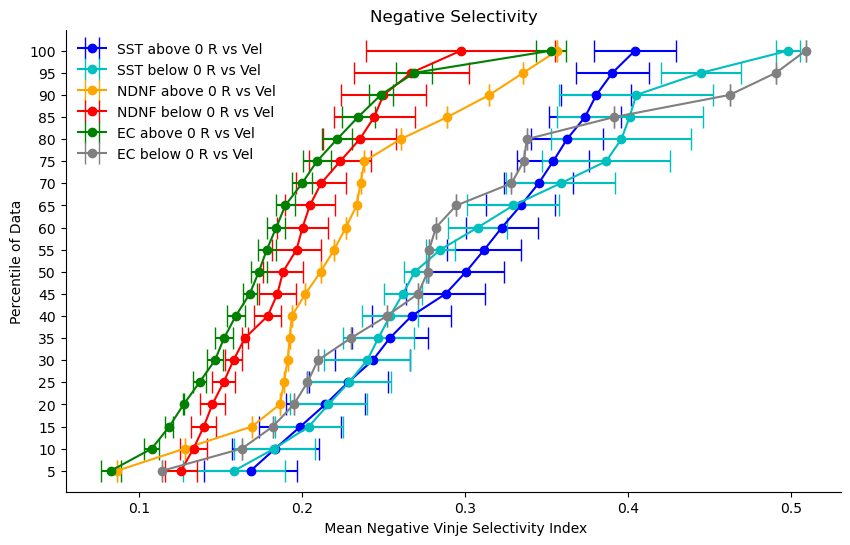

In [40]:
#selectivity metrics by velocity correlation 
    
setup_CDF_plotting_and_plot_selectivity_split_by_r2(activity_dict_SST, predicted_activity_dict_SST, activity_dict_NDNF,
                                            predicted_activity_dict_NDNF, activity_dict_EC, predicted_activity_dict_EC,
                                            residual=True)


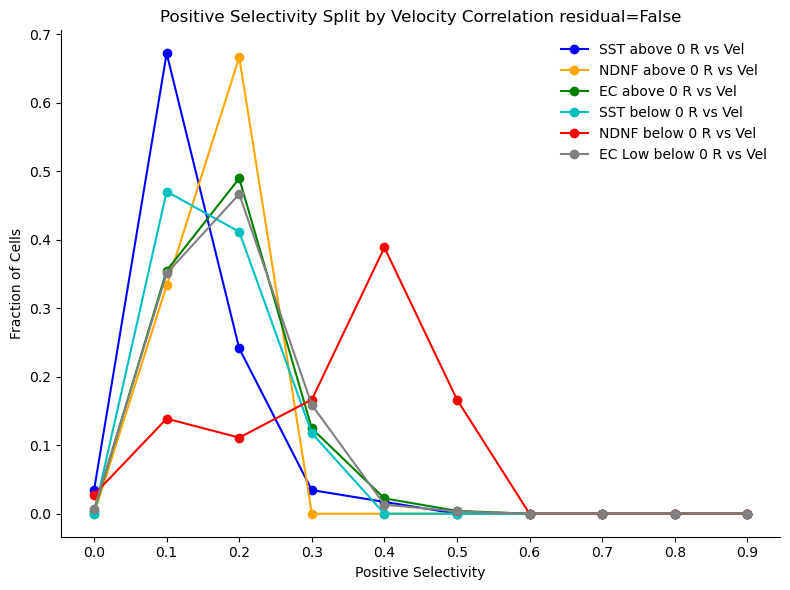

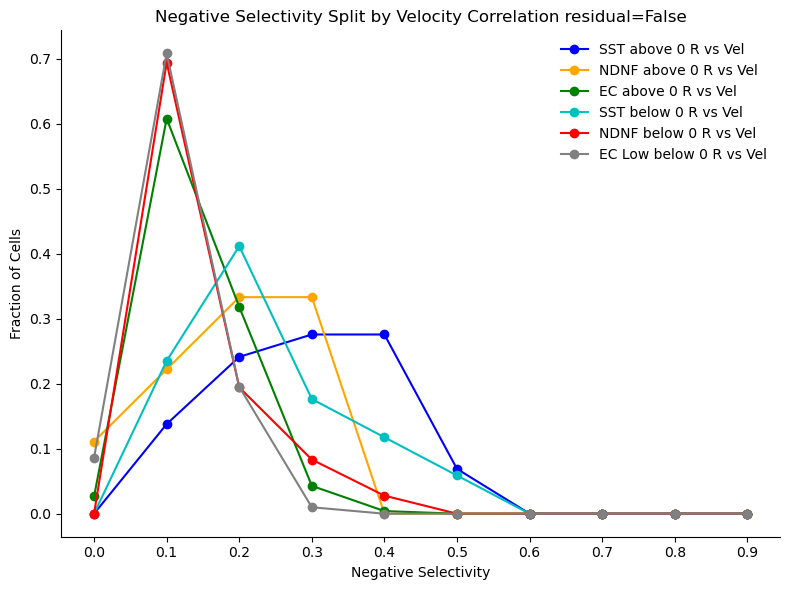

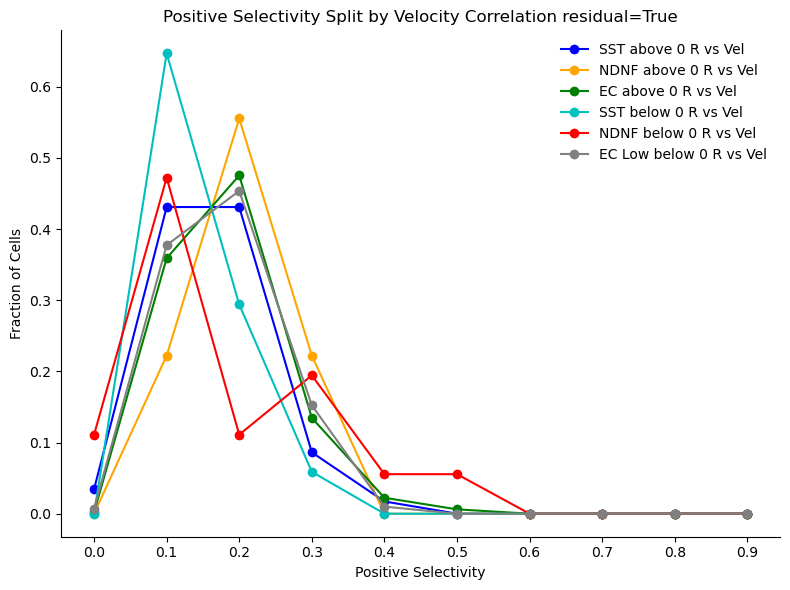

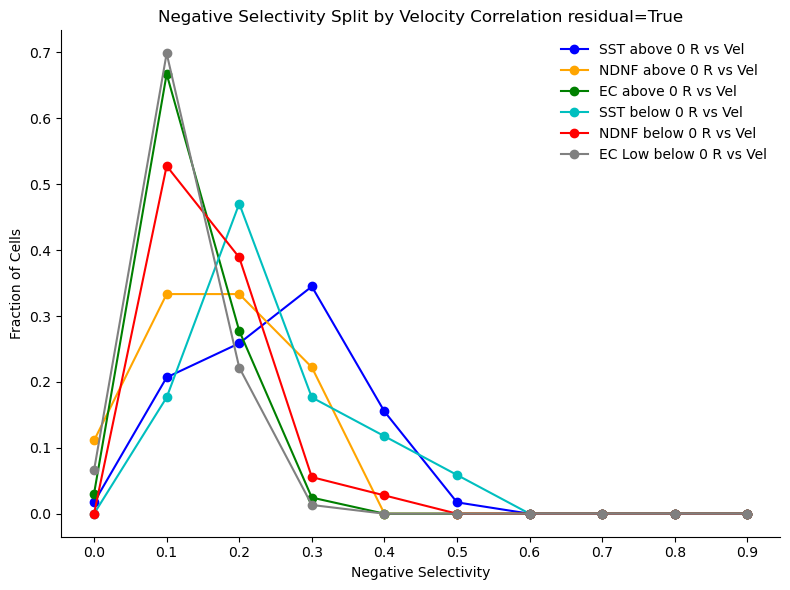

In [14]:
#selectivity metrics by velocity correlation histogram 

SST_above_zero_selectivity_pos, SST_below_zero_selectivity_pos, NDNF_above_zero_selectivity_pos, NDNF_below_zero_selectivity_pos, EC_above_zero_selectivity_pos, EC_below_zero_selectivity_pos = split_selectivity_by_r2(activity_dict_SST, predicted_activity_dict_SST, 
                            activity_dict_NDNF, predicted_activity_dict_NDNF, 
                            activity_dict_EC, predicted_activity_dict_EC, 
                            residual=False, compute_negative=False)

SST_above_zero_selectivity_neg, SST_below_zero_selectivity_neg, NDNF_above_zero_selectivity_neg, NDNF_below_zero_selectivity_neg, EC_above_zero_selectivity_neg, EC_below_zero_selectivity_neg = split_selectivity_by_r2(activity_dict_SST, predicted_activity_dict_SST, 
                            activity_dict_NDNF, predicted_activity_dict_NDNF, 
                            activity_dict_EC, predicted_activity_dict_EC, 
                            residual=False, compute_negative=True)

    
plot_frequency_hist_split_by_r2(SST_above_zero_selectivity_pos, SST_below_zero_selectivity_pos, NDNF_above_zero_selectivity_pos, NDNF_below_zero_selectivity_pos, EC_above_zero_selectivity_pos, EC_below_zero_selectivity_pos, selectivity_or_arg="selectivity", name="Positive Selectivity", residual=False)

plot_frequency_hist_split_by_r2(SST_above_zero_selectivity_neg, SST_below_zero_selectivity_neg, NDNF_above_zero_selectivity_neg, NDNF_below_zero_selectivity_neg, EC_above_zero_selectivity_neg, EC_below_zero_selectivity_neg, selectivity_or_arg="selectivity", name="Negative Selectivity", residual=False)


SST_above_zero_selectivity_pos, SST_below_zero_selectivity_pos, NDNF_above_zero_selectivity_pos, NDNF_below_zero_selectivity_pos, EC_above_zero_selectivity_pos, EC_below_zero_selectivity_pos = split_selectivity_by_r2(activity_dict_SST, predicted_activity_dict_SST, 
                            activity_dict_NDNF, predicted_activity_dict_NDNF, 
                            activity_dict_EC, predicted_activity_dict_EC, 
                            residual=True, compute_negative=False)

SST_above_zero_selectivity_neg, SST_below_zero_selectivity_neg, NDNF_above_zero_selectivity_neg, NDNF_below_zero_selectivity_neg, EC_above_zero_selectivity_neg, EC_below_zero_selectivity_neg = split_selectivity_by_r2(activity_dict_SST, predicted_activity_dict_SST, 
                            activity_dict_NDNF, predicted_activity_dict_NDNF, 
                            activity_dict_EC, predicted_activity_dict_EC, 
                            residual=True, compute_negative=True)

    
plot_frequency_hist_split_by_r2(SST_above_zero_selectivity_pos, SST_below_zero_selectivity_pos, NDNF_above_zero_selectivity_pos, NDNF_below_zero_selectivity_pos, EC_above_zero_selectivity_pos, EC_below_zero_selectivity_pos, selectivity_or_arg="selectivity", name="Positive Selectivity", residual=True)

plot_frequency_hist_split_by_r2(SST_above_zero_selectivity_neg, SST_below_zero_selectivity_neg, NDNF_above_zero_selectivity_neg, NDNF_below_zero_selectivity_neg, EC_above_zero_selectivity_neg, EC_below_zero_selectivity_neg, selectivity_or_arg="selectivity", name="Negative Selectivity", residual=True)


residual False


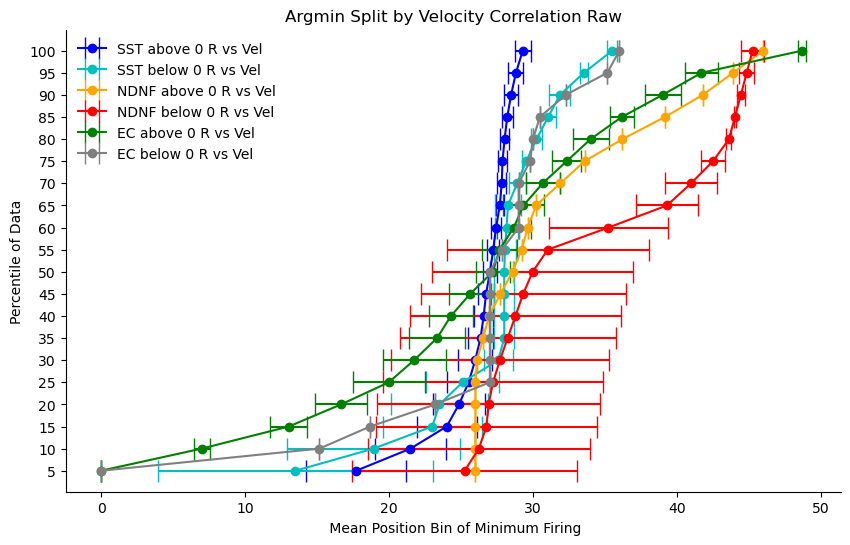

residual False


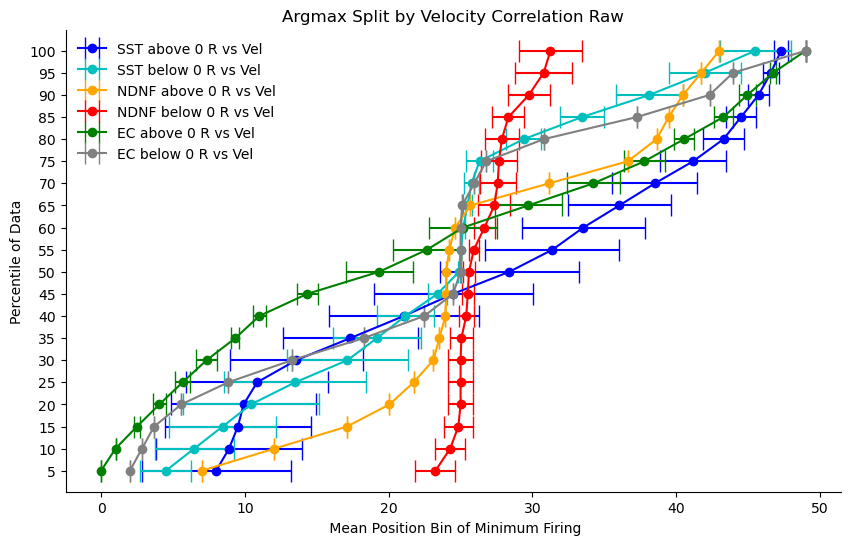

residual True


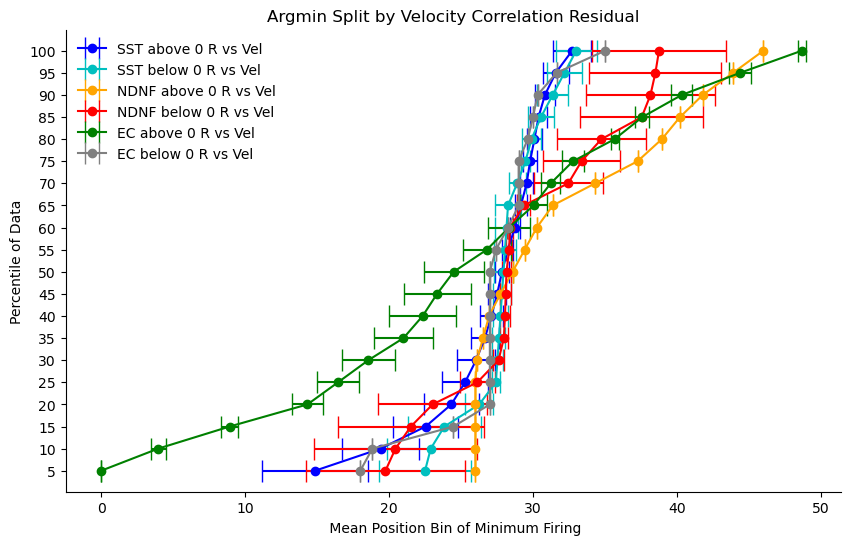

residual True


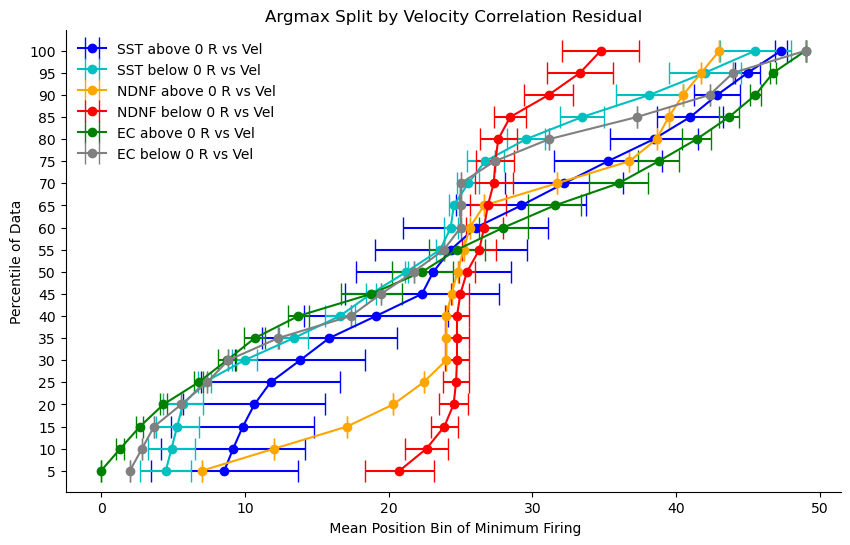

In [16]:
########## raw data 

setup_CDF_plotting_and_plot_argmin_argmax_split_by_r2(activity_dict_SST, predicted_activity_dict_SST, activity_dict_NDNF,
                                              predicted_activity_dict_NDNF, activity_dict_EC,
                                              predicted_activity_dict_EC, residual=False, which_to_plot="argmin")

setup_CDF_plotting_and_plot_argmin_argmax_split_by_r2(activity_dict_SST, predicted_activity_dict_SST, activity_dict_NDNF,
                                              predicted_activity_dict_NDNF, activity_dict_EC,
                                              predicted_activity_dict_EC, residual=False, which_to_plot="argmax")


########## residuals 


setup_CDF_plotting_and_plot_argmin_argmax_split_by_r2(activity_dict_SST, predicted_activity_dict_SST, activity_dict_NDNF,
                                              predicted_activity_dict_NDNF, activity_dict_EC,
                                              predicted_activity_dict_EC, residual=True, which_to_plot="argmin")

setup_CDF_plotting_and_plot_argmin_argmax_split_by_r2(activity_dict_SST, predicted_activity_dict_SST, activity_dict_NDNF,
                                              predicted_activity_dict_NDNF, activity_dict_EC,
                                              predicted_activity_dict_EC, residual=True, which_to_plot="argmax")





residual False
residual False


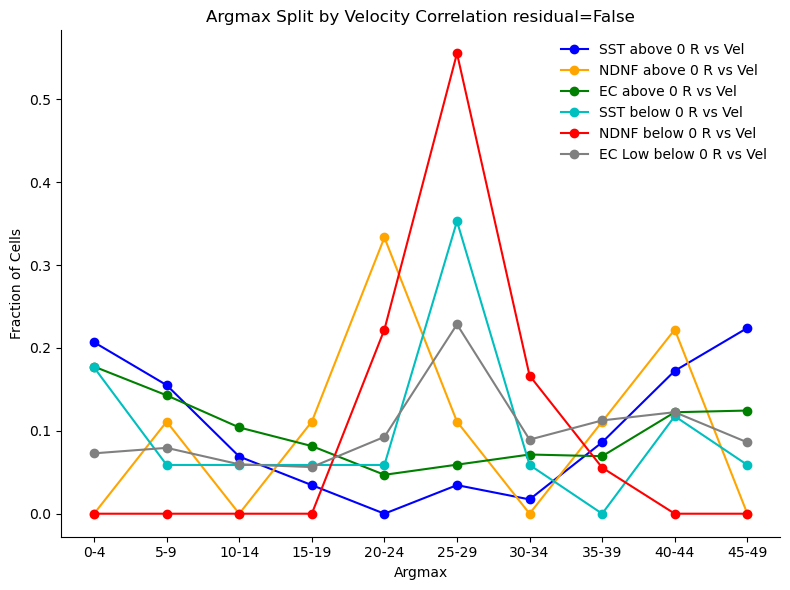

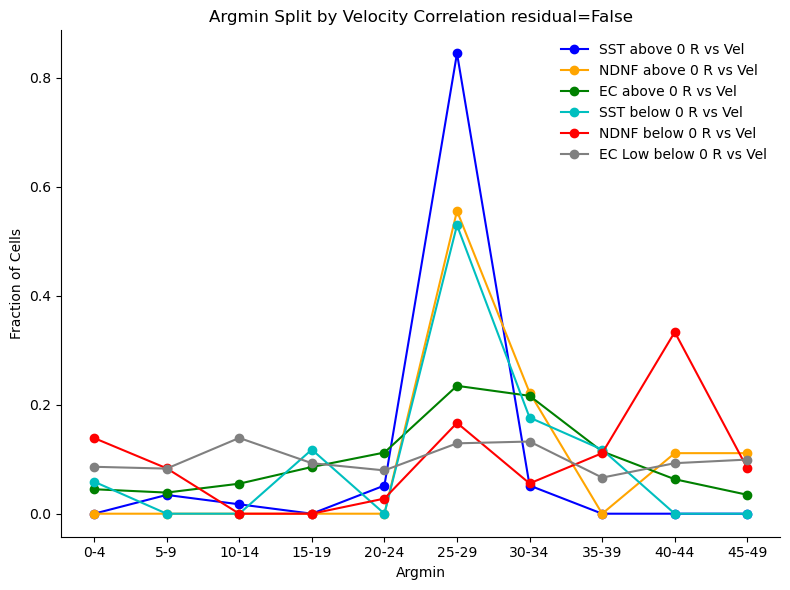

residual True
residual True


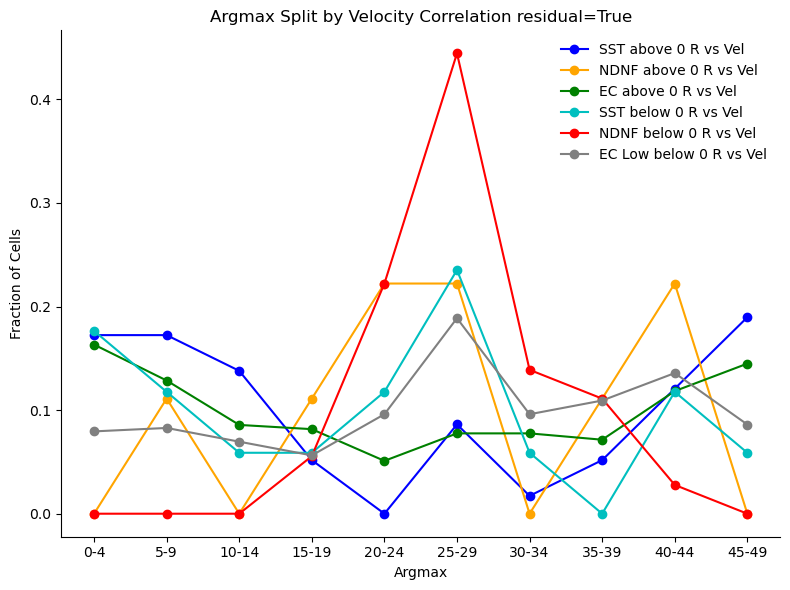

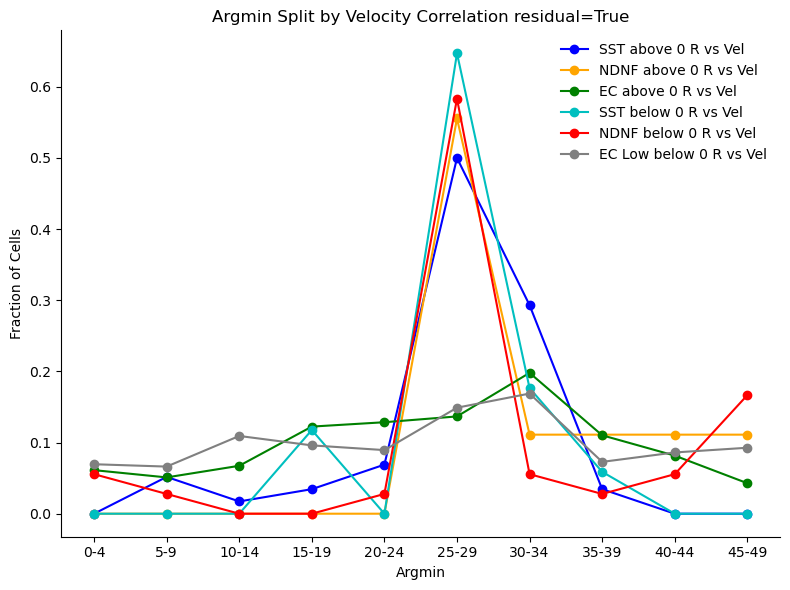

In [19]:

r2_SST_above_zero, r2_SST_below_zero = get_r2_above_and_below_zero(activity_dict_SST, predicted_activity_dict_SST, filtered_factors_dict_SST,
                                variable_to_correlate="Velocity")
    
r2_NDNF_above_zero, r2_NDNF_below_zero = get_r2_above_and_below_zero(activity_dict_NDNF, predicted_activity_dict_NDNF, filtered_factors_dict_NDNF,
                                variable_to_correlate="Velocity")
    
r2_EC_above_zero, r2_EC_below_zero = get_r2_above_and_below_zero(activity_dict_EC, predicted_activity_dict_EC, filtered_factors_dict_EC,
                                variable_to_correlate="Velocity")



SST_above_zero_selectivity_pos, SST_below_zero_selectivity_pos, NDNF_above_zero_selectivity_pos, NDNF_below_zero_selectivity_pos, EC_above_zero_selectivity_pos, EC_below_zero_selectivity_pos =split_argmin_argmax_by_r2(activity_dict_SST, predicted_activity_dict_SST, activity_dict_NDNF, predicted_activity_dict_NDNF,
                              activity_dict_EC, predicted_activity_dict_EC, r2_SST_above_zero, r2_SST_below_zero, r2_NDNF_above_zero, r2_NDNF_below_zero, r2_EC_above_zero, r2_EC_below_zero, residual=False, which_to_plot="argmax")



SST_above_zero_selectivity_neg, SST_below_zero_selectivity_neg, NDNF_above_zero_selectivity_neg, NDNF_below_zero_selectivity_neg, EC_above_zero_selectivity_neg, EC_below_zero_selectivity_neg = split_argmin_argmax_by_r2(activity_dict_SST, predicted_activity_dict_SST,
                              activity_dict_NDNF, predicted_activity_dict_NDNF, activity_dict_EC, predicted_activity_dict_EC, r2_SST_above_zero, r2_SST_below_zero, r2_NDNF_above_zero, r2_NDNF_below_zero, r2_EC_above_zero, r2_EC_below_zero, residual=False, which_to_plot="argmin")


plot_frequency_hist_split_by_r2(SST_above_zero_selectivity_pos, SST_below_zero_selectivity_pos, NDNF_above_zero_selectivity_pos, NDNF_below_zero_selectivity_pos, EC_above_zero_selectivity_pos, EC_below_zero_selectivity_pos, selectivity_or_arg="arg", name="Argmax", residual=False)

plot_frequency_hist_split_by_r2(SST_above_zero_selectivity_neg, SST_below_zero_selectivity_neg, NDNF_above_zero_selectivity_neg, NDNF_below_zero_selectivity_neg, EC_above_zero_selectivity_neg, EC_below_zero_selectivity_neg, selectivity_or_arg="arg", name="Argmin", residual=False)








r2_SST_above_zero, r2_SST_below_zero = get_r2_above_and_below_zero(activity_dict_SST, predicted_activity_dict_SST, filtered_factors_dict_SST,
                                variable_to_correlate="Velocity")
    
r2_NDNF_above_zero, r2_NDNF_below_zero = get_r2_above_and_below_zero(activity_dict_NDNF, predicted_activity_dict_NDNF, filtered_factors_dict_NDNF,
                                variable_to_correlate="Velocity")
    
r2_EC_above_zero, r2_EC_below_zero = get_r2_above_and_below_zero(activity_dict_EC, predicted_activity_dict_EC, filtered_factors_dict_EC,
                                variable_to_correlate="Velocity")



SST_above_zero_selectivity_pos, SST_below_zero_selectivity_pos, NDNF_above_zero_selectivity_pos, NDNF_below_zero_selectivity_pos, EC_above_zero_selectivity_pos, EC_below_zero_selectivity_pos =split_argmin_argmax_by_r2(activity_dict_SST, predicted_activity_dict_SST, activity_dict_NDNF, predicted_activity_dict_NDNF,
                              activity_dict_EC, predicted_activity_dict_EC, r2_SST_above_zero, r2_SST_below_zero, r2_NDNF_above_zero, r2_NDNF_below_zero, r2_EC_above_zero, r2_EC_below_zero, residual=True, which_to_plot="argmax")



SST_above_zero_selectivity_neg, SST_below_zero_selectivity_neg, NDNF_above_zero_selectivity_neg, NDNF_below_zero_selectivity_neg, EC_above_zero_selectivity_neg, EC_below_zero_selectivity_neg = split_argmin_argmax_by_r2(activity_dict_SST, predicted_activity_dict_SST,
                              activity_dict_NDNF, predicted_activity_dict_NDNF, activity_dict_EC, predicted_activity_dict_EC, r2_SST_above_zero, r2_SST_below_zero, r2_NDNF_above_zero, r2_NDNF_below_zero, r2_EC_above_zero, r2_EC_below_zero, residual=True, which_to_plot="argmin")


plot_frequency_hist_split_by_r2(SST_above_zero_selectivity_pos, SST_below_zero_selectivity_pos, NDNF_above_zero_selectivity_pos, NDNF_below_zero_selectivity_pos, EC_above_zero_selectivity_pos, EC_below_zero_selectivity_pos, selectivity_or_arg="arg", name="Argmax", residual=True)

plot_frequency_hist_split_by_r2(SST_above_zero_selectivity_neg, SST_below_zero_selectivity_neg, NDNF_above_zero_selectivity_neg, NDNF_below_zero_selectivity_neg, EC_above_zero_selectivity_neg, EC_below_zero_selectivity_neg, selectivity_or_arg="arg", name="Argmin", residual=True)



In [20]:
############################## Learning --- Quintile 1 of Trials vs Quintile 5 ###############################

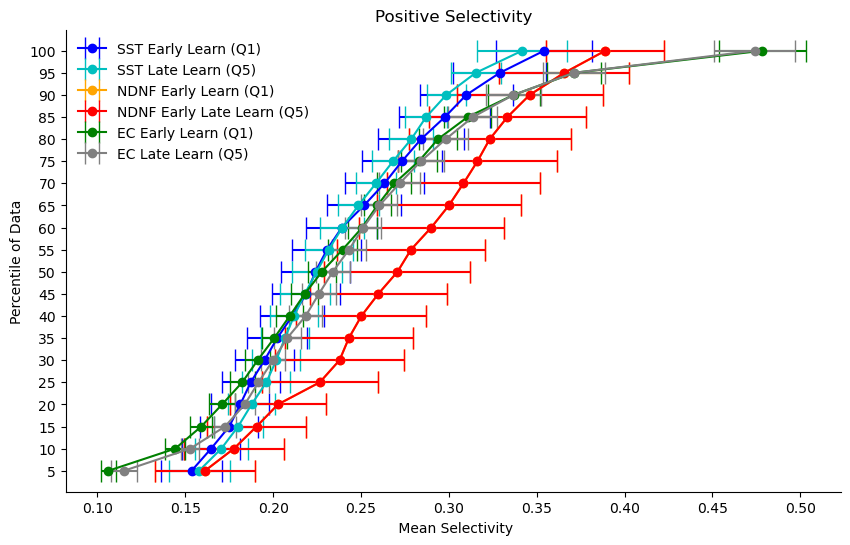

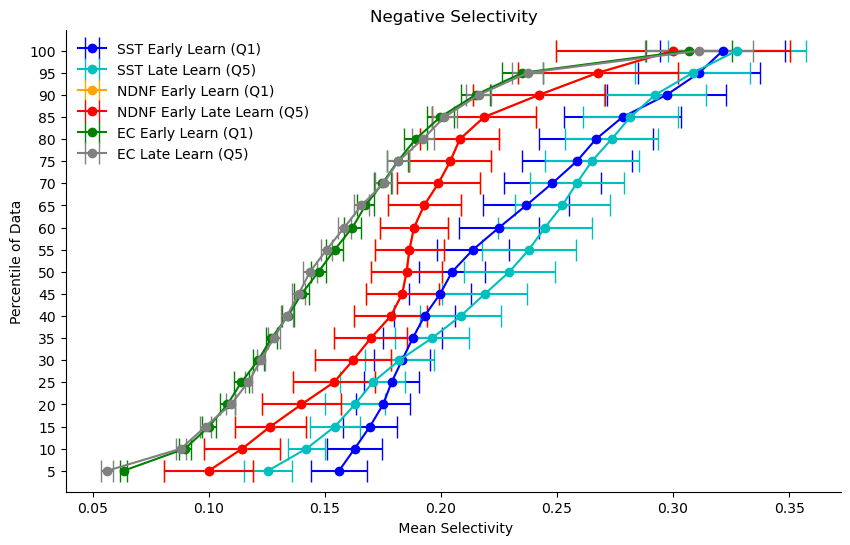

In [23]:


plot_positive_negative_selectivity_by_quintile(activity_dict_SST, predicted_activity_dict_SST, activity_dict_NDNF,
                                                   predicted_activity_dict_NDNF, activity_dict_EC,
                                                   predicted_activity_dict_EC)

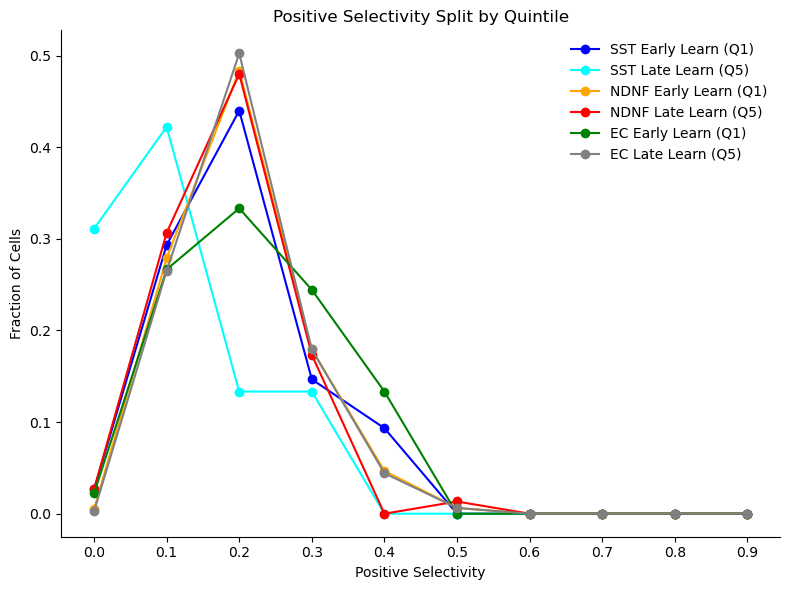

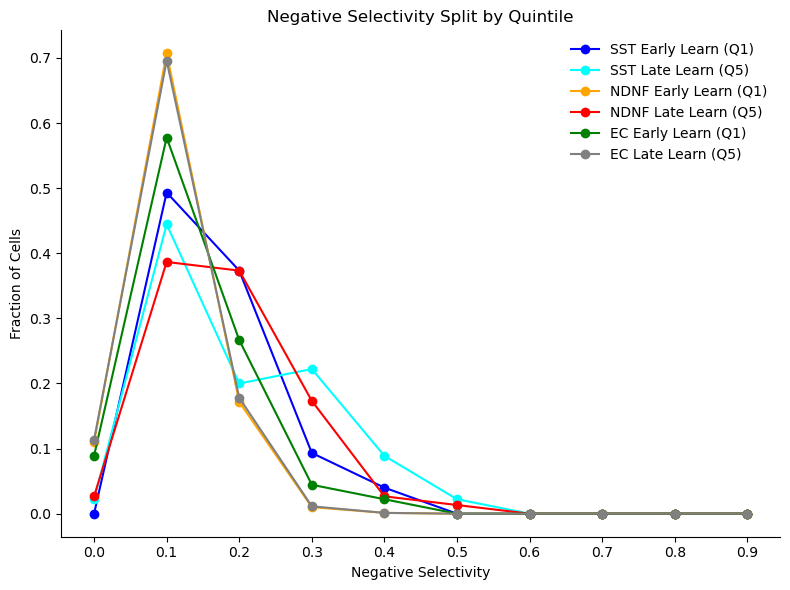

In [25]:

    
activity_list_SST_q1, activity_list_SST_q5, prediction_list_SST_q1, prediction_list_SST_q5, residual_q1_SST, residual_q5_SST = split_activity_and_prediction_into_quintiles(
    activity_dict_SST, predicted_activity_dict_SST)
activity_list_NDNF_q1, activity_list_NDNF_q5, prediction_list_NDNF_q1, prediction_list_NDNF_q5, residual_q1_NDNF, residual_q5_NDNF = split_activity_and_prediction_into_quintiles(
    activity_dict_NDNF, predicted_activity_dict_NDNF)
activity_list_EC_q1, activity_list_EC_q5, predicted_activity_list_EC_q1, predicted_activity_list_EC_q5, residual_q1_EC, residual_q5_EC = split_activity_and_prediction_into_quintiles(
    activity_dict_EC, predicted_activity_dict_EC)

SST_positive_selectivity_q1, SST_negative_selectivity_q1, NDNF_positive_selectivity_q1, NDNF_negative_selectivity_q1, EC_positive_selectivity_q1, EC_negative_selectivity_q1 = get_selectivity_for_plotting_lists(
    residual_q1_SST, residual_q1_NDNF, residual_q1_EC)

SST_positive_selectivity_q5, SST_negative_selectivity_q5, NDNF_positive_selectivity_q5, NDNF_negative_selectivity_q5, EC_positive_selectivity_q5, EC_negative_selectivity_q5 = get_selectivity_for_plotting_lists(
    residual_q5_SST, residual_q5_NDNF, residual_q5_EC) 


plot_frequency_hist_learning(SST_positive_selectivity_q1, SST_positive_selectivity_q5, NDNF_positive_selectivity_q1, NDNF_positive_selectivity_q5, EC_positive_selectivity_q1, EC_positive_selectivity_q5, selectivity_or_arg="selectivity", name="Positive Selectivity")
plot_frequency_hist_learning(SST_negative_selectivity_q1, SST_negative_selectivity_q5, NDNF_negative_selectivity_q1, NDNF_negative_selectivity_q5, EC_negative_selectivity_q1, EC_negative_selectivity_q5, selectivity_or_arg="selectivity", name="Negative Selectivity")


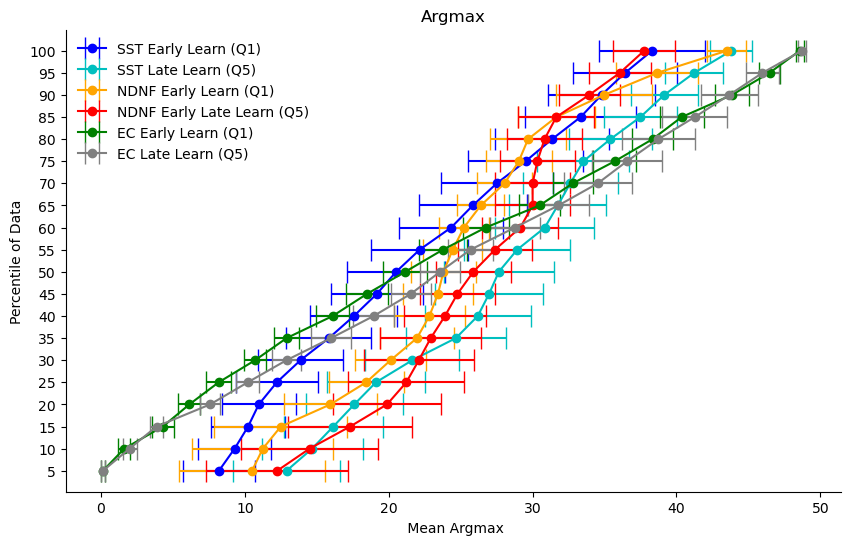

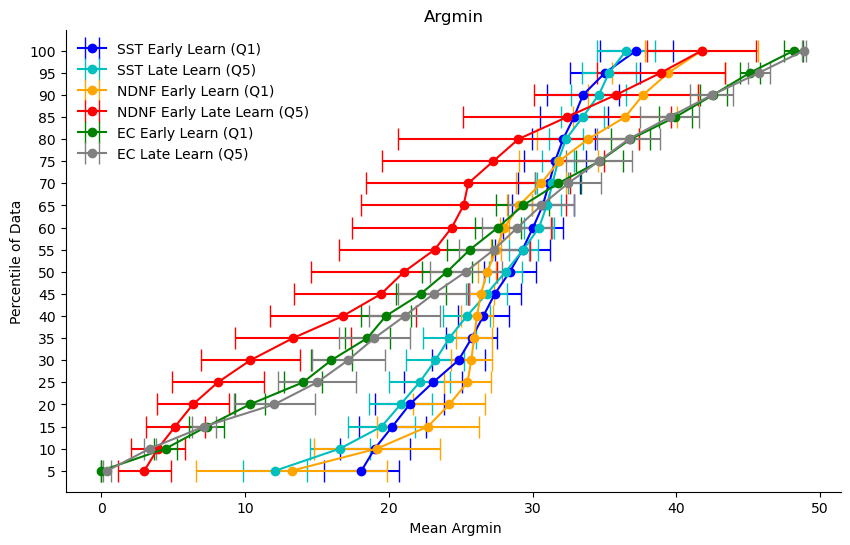

In [26]:

get_argmin_argmax_split_learning(activity_dict_SST, predicted_activity_dict_SST, activity_dict_NDNF,
                                     predicted_activity_dict_NDNF, activity_dict_EC, predicted_activity_dict_EC)
    
    

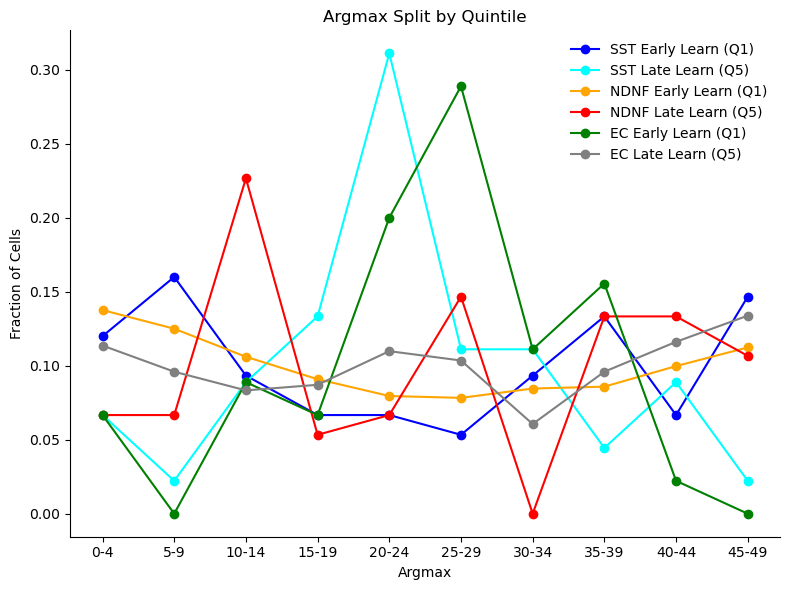

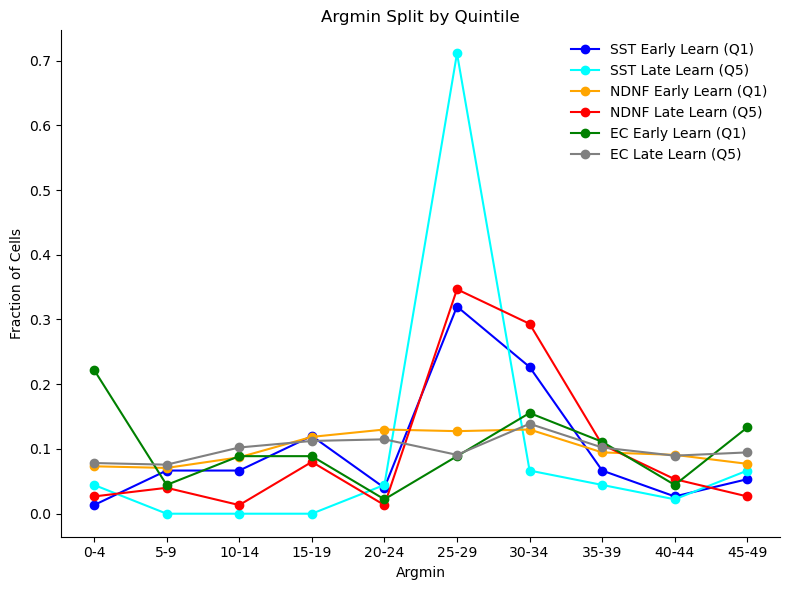

In [27]:

get_argmin_argmax_split_learning_histogram(activity_dict_SST, predicted_activity_dict_SST, activity_dict_NDNF,
                                     predicted_activity_dict_NDNF, activity_dict_EC, predicted_activity_dict_EC)
    
    

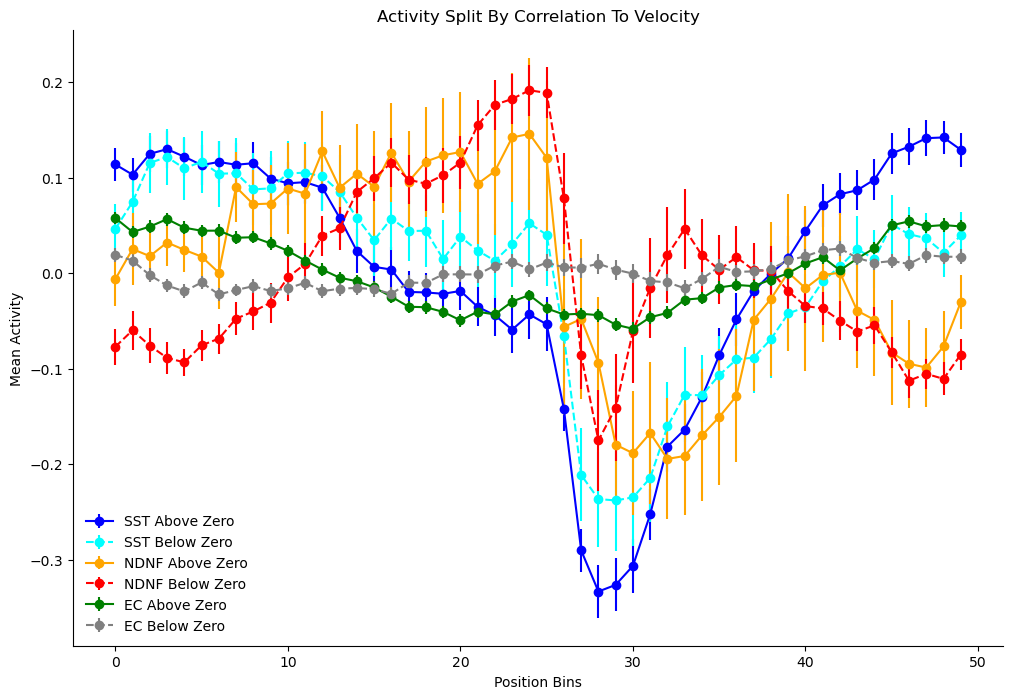

In [30]:
    

r2_SST_above_zero, r2_SST_below_zero = get_r2_above_and_below_zero(activity_dict_SST, predicted_activity_dict_SST, filtered_factors_dict_SST,
                                variable_to_correlate="Velocity")
r2_NDNF_above_zero, r2_NDNF_below_zero = get_r2_above_and_below_zero(activity_dict_NDNF, predicted_activity_dict_NDNF, filtered_factors_dict_NDNF,
                                variable_to_correlate="Velocity")
r2_EC_above_zero, r2_EC_below_zero = get_r2_above_and_below_zero(activity_dict_EC, predicted_activity_dict_EC, filtered_factors_dict_EC,
                                variable_to_correlate="Velocity")
    
plot_activity_by_r2_groups(activity_dict_SST, predicted_activity_dict_SST, r2_SST_above_zero, r2_SST_below_zero,
                               activity_dict_NDNF, predicted_activity_dict_NDNF, r2_NDNF_above_zero, r2_NDNF_below_zero,
                               activity_dict_EC, predicted_activity_dict_EC, r2_EC_above_zero, r2_EC_below_zero)


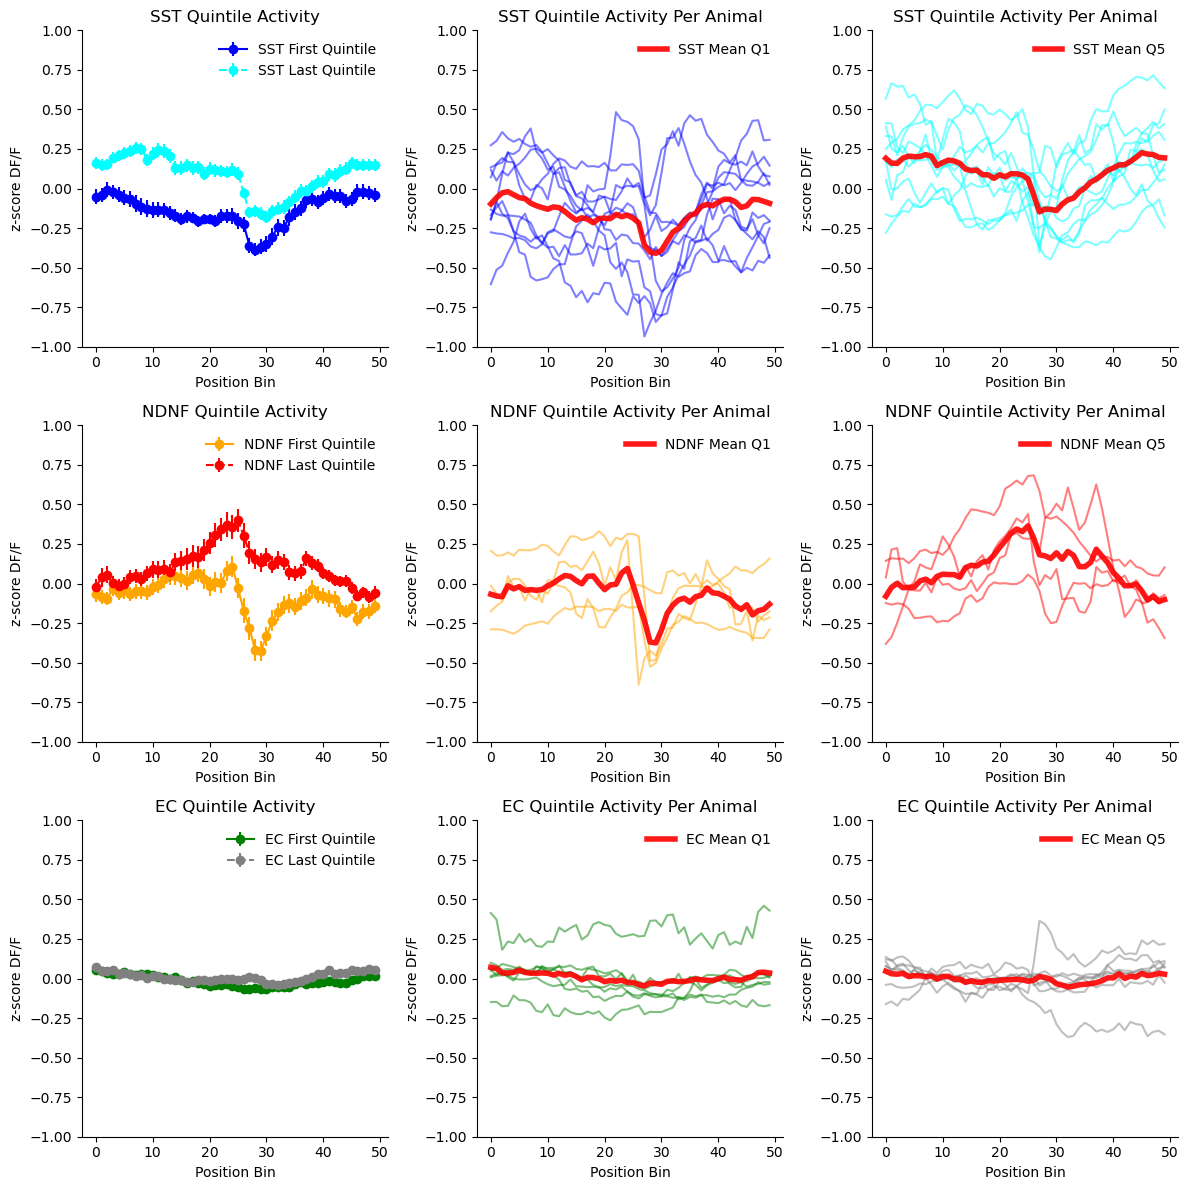

In [118]:

plot_first_and_last_quintile(activity_dict_SST, predicted_activity_dict_SST, activity_dict_NDNF, predicted_activity_dict_NDNF, activity_dict_EC, predicted_activity_dict_EC)


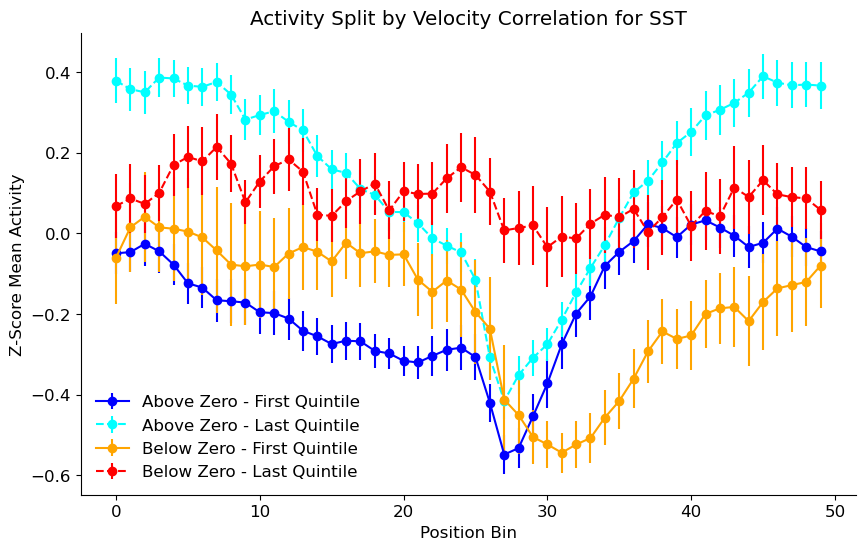

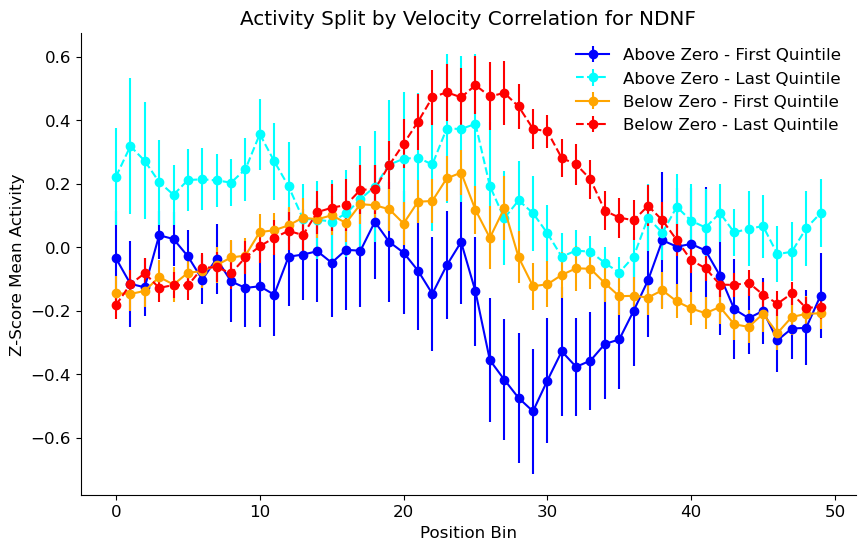

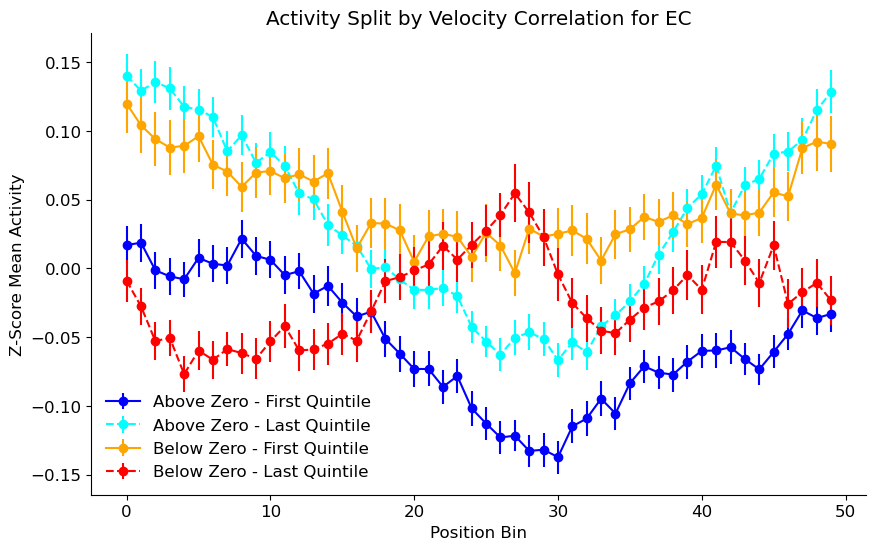

In [27]:


r2_variable_activity_dict_SST, r2_variable_residual_dict_SST = get_pop_correlation_to_variable(activity_dict_SST, predicted_activity_dict_SST, filtered_factors_dict_SST, variable_to_correlate="Velocity")

r2_variable_activity_dict_NDNF, r2_variable_residual_dict_NDNF = get_pop_correlation_to_variable(activity_dict_NDNF, predicted_activity_dict_NDNF, filtered_factors_dict_NDNF, variable_to_correlate="Velocity")


r2_variable_activity_dict_EC, r2_variable_residual_dict_EC = get_pop_correlation_to_variable(activity_dict_EC, predicted_activity_dict_EC, filtered_factors_dict_EC, variable_to_correlate="Velocity")


r2_SST_above_zero, r2_SST_below_zero = get_r2_above_and_below_zero(activity_dict_SST, predicted_activity_dict_SST, filtered_factors_dict_SST,
                                variable_to_correlate="Velocity")
r2_NDNF_above_zero, r2_NDNF_below_zero = get_r2_above_and_below_zero(activity_dict_NDNF, predicted_activity_dict_NDNF, filtered_factors_dict_NDNF,
                                variable_to_correlate="Velocity")
r2_EC_above_zero, r2_EC_below_zero = get_r2_above_and_below_zero(activity_dict_EC, predicted_activity_dict_EC, filtered_factors_dict_EC,
                                variable_to_correlate="Velocity")

plot_mean_and_sem_by_r2(activity_dict_SST, r2_SST_above_zero, r2_SST_below_zero, cell_type="SST")
plot_mean_and_sem_by_r2(activity_dict_NDNF, r2_NDNF_above_zero, r2_NDNF_below_zero, cell_type="NDNF")
plot_mean_and_sem_by_r2(activity_dict_EC, r2_EC_above_zero, r2_EC_below_zero, cell_type="EC")
